# INTERN NAME: SAYAM KUMAR

## Importing the relevant libraries

In [129]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")
import re
import matplotlib.ticker as ticker
from matplotlib.ticker import PercentFormatter

In [2]:
np.set_printoptions(suppress=True,linewidth=150,precision=2)

In [3]:
plt.rcParams['figure.figsize'] = (20,10)

## Importing the dataset

In [4]:
data = pd.read_excel('Kolkata_tier1_data.xlsx')
photo_data = data.copy()
photo_data.head()

,Name,Type,Location,Website,Contact,Contact number avilable?,Internet,Photographer name,comment,Employees in studio,Monthly orders,Problems,Internet (Brand),Internet (Speed),Internet (Monthly Cost),Which cloud storage they use,How they do photo selection,Provides E-book?,Album designing(Own?)
0,Best Candid Wedding Photographers in Kolkata I...,· Wedding photographer,Kolkata,https://www.thesparklingwedding.com/,074399 68048,1.0,1.0,shreeman,no issues,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,PIP Broadcast | Best Wedding Photographers in ...,· Wedding photographer,Kolkata,https://www.pipbroadcast.com/,090882 76753,1.0,1.0,NaN,dont share info,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Maternity Photographer & Baby Photographer in ...,· Photographer,Kolkata,https://www.babyphotographerkolkata.com/,062893 53378,1.0,1.0,Raja Das,no issues,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Candid photographer in Kolkata,· Wedding photographer,Kolkata,NaN,098304 11993,1.0,0.0,Piyush Rao,no issues,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Wedding Photographers in Kolkata | QpidIndia,· Wedding photographer,Kolkata,http://www.qpidindia.in/,089100 14860,1.0,1.0,Dbarghya Saha,not interested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Checking for presence of null values within the dataset

In [5]:
photo_data.isnull().sum()

Name                              2
Type                              2
Location                          2
Website                          37
Contact                           2
Contact number avilable?          2
Internet                          1
Photographer name                73
comment                          15
Employees in studio              92
Monthly orders                   96
Problems                        118
Internet (Brand)                104
Internet (Speed)                108
Internet (Monthly Cost)         109
Which cloud storage they use    102
How they do photo selection     101
Provides E-book?                 95
Album designing(Own?)            95
dtype: int64

## Checking for duplicated data if any

In [6]:
photo_data[photo_data.duplicated()]

,Name,Type,Location,Website,Contact,Contact number avilable?,Internet,Photographer name,comment,Employees in studio,Monthly orders,Problems,Internet (Brand),Internet (Speed),Internet (Monthly Cost),Which cloud storage they use,How they do photo selection,Provides E-book?,Album designing(Own?)


## Examining and understanding the dataset

In [7]:
photo_data.shape

(128, 19)

In [8]:
photo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          126 non-null    object 
 1   Type                          126 non-null    object 
 2   Location                      126 non-null    object 
 3   Website                       91 non-null     object 
 4   Contact                       126 non-null    object 
 5   Contact number avilable?      126 non-null    float64
 6   Internet                      127 non-null    float64
 7   Photographer name             55 non-null     object 
 8   comment                       113 non-null    object 
 9   Employees in studio           36 non-null     object 
 10  Monthly orders                32 non-null     object 
 11  Problems                      10 non-null     object 
 12  Internet (Brand)              24 non-null     object 
 13  Inter

In [9]:
photo_data.rename(columns={'Employees in studio': 'No. of Employees in Studio', 'Problems ': 'Problems', 'comment': 'Comment', 'Which cloud storage they use': 'Cloud Storage Used','Album designing(Own?)': 'Album Designing', 'Monthly orders': 'Monthly Orders','Photographer name': "Photographer's name", 'How they do photo selection': 'How is photograph developed?', 'Contact number avilable?': 'Contact number available?'},inplace=True)

In [10]:
photo_data.describe()

,Contact number available?,Internet
count,126.0,127.000000
mean,1.0,1.433071
std,0.0,8.023369
min,1.0,0.000000
25%,1.0,0.000000
50%,1.0,1.000000
75%,1.0,1.000000
max,1.0,91.000000


In [11]:
photo_data['Album Designing'].value_counts()

yes          24
No            2
Yes           2
no            2
Outsource     1
Own           1
outsource     1
Name: Album Designing, dtype: int64

In [12]:
photo_data['Album Designing'] = np.where(photo_data['Album Designing']=="yes",1,photo_data['Album Designing'])
photo_data['Album Designing'] = np.where(photo_data['Album Designing']=="Yes",1,photo_data['Album Designing'])
photo_data['Album Designing'] = np.where(photo_data['Album Designing']=="Own",1,photo_data['Album Designing'])
photo_data['Album Designing'] = np.where(photo_data['Album Designing']=="no",0,photo_data['Album Designing'])
photo_data['Album Designing'] = np.where(photo_data['Album Designing']=="No",1,photo_data['Album Designing'])
photo_data['Album Designing'] = np.where(photo_data['Album Designing']=="outsource",0,photo_data['Album Designing'])
photo_data['Album Designing'] = np.where(photo_data['Album Designing']=="Outsource",0,photo_data['Album Designing'])
photo_data['Album Designing'] = np.where(photo_data['Album Designing']==np.nan,1,photo_data['Album Designing'])

In [14]:
photo_data['Provides E-book? '] = np.where(photo_data['Provides E-book? ']=='yes',1,photo_data['Provides E-book? '])
photo_data['Provides E-book? '] = np.where(photo_data['Provides E-book? ']=='Yes',1,photo_data['Provides E-book? '])
photo_data['Provides E-book? '] = np.where(photo_data['Provides E-book? ']=='no',0,photo_data['Provides E-book? '])
photo_data['Provides E-book? '] = np.where(photo_data['Provides E-book? ']=='No',0,photo_data['Provides E-book? '])
photo_data['Provides E-book? '] = np.where(photo_data['Provides E-book? ']=='Complementary',1,photo_data['Provides E-book? '])

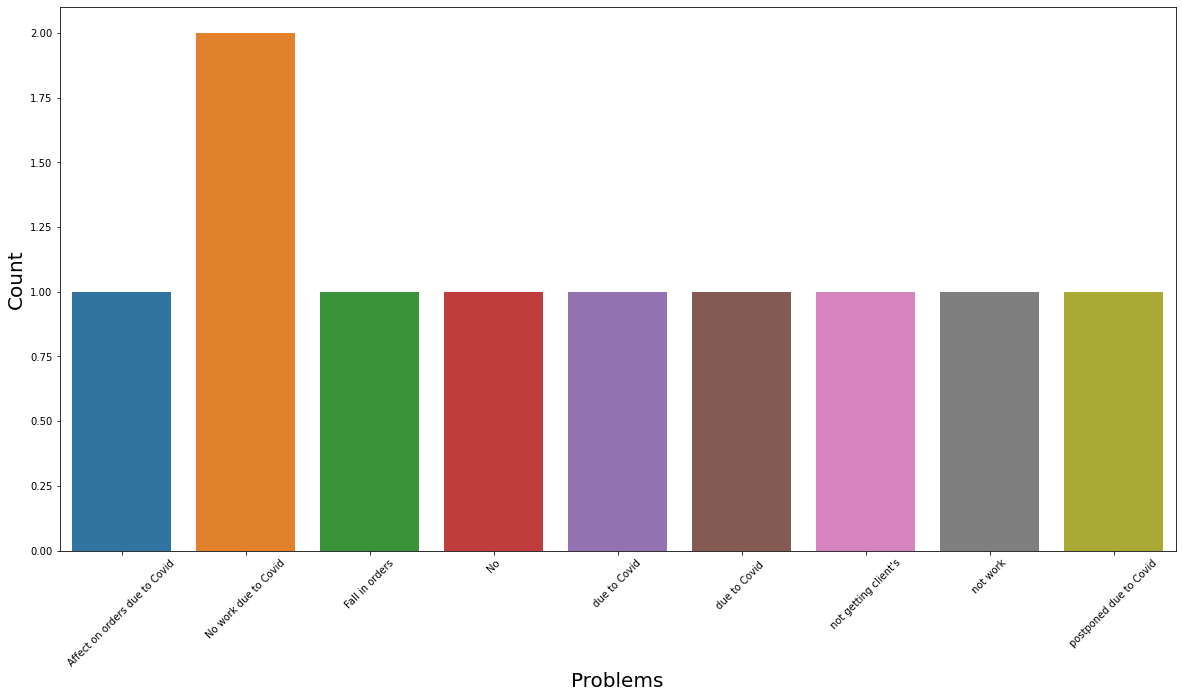

In [15]:
plt.figure(figsize=(20,10))
sns.countplot(x='Problems',data=photo_data)
plt.xticks(rotation=45)
plt.xlabel('Problems',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.show()

## The major problem faced while facilitating the work of photograph companies is the lack of work due to extensive spread of Covid disease.

In [16]:
photo_data = photo_data[photo_data['Photographer\'s name']!=0.7222]
photo_data['Photographer\'s name'].value_counts()

shreeman                 1
rabin                    1
sakhar Chaudhary         1
begajapoi                1
Priyam maji              1
Soumya shankar Ghosal    1
amit kumar               1
Abhijeet                 1
sumit das                1
monojit                  1
Suman pasand             1
Supriya manna            1
prakash                  1
Somnath roy              1
Saikat                   1
Rajveer                  1
Subha                    1
Azhar                    1
sujith gupta             1
Rajib Saha               1
subhankar                1
krishnendu               1
rehan                    1
ritam paul               1
rishav chakraborty       1
swaroop                  1
tirtha mitra             1
ajay Arman               1
Raja Das                 1
Aniket Paul              1
Piyush Rao               1
Dbarghya Saha            1
debanu                   1
Rahul Basu               1
Gourav Ghosh             1
Rig Biswas               1
Rana lodh                1
S

In [17]:
photo_data = photo_data[(photo_data['No. of Employees in Studio']!='freelance')&(photo_data['No. of Employees in Studio']!='freelancer')]
photo_data['No. of Employees in Studio'].value_counts()

2     9
4     5
15    3
1     3
5     3
3     3
10    2
18    1
16    1
6     1
35    1
25    1
20    1
Name: No. of Employees in Studio, dtype: int64

## Since the columns 'Website', 'Contact', 'Location' and 'Contact number available?' are irrelevant from the context of our analysis, so we can omit them.

In [18]:
photo_data.drop(columns=['Website','Contact','Contact number available?','Location'],inplace=True)

In [20]:
photo_data['Cloud Storage Used'].value_counts()

pendrive                  17
Google                     3
No                         2
My air bridge              1
pendrive, Google drive     1
Name: Cloud Storage Used, dtype: int64

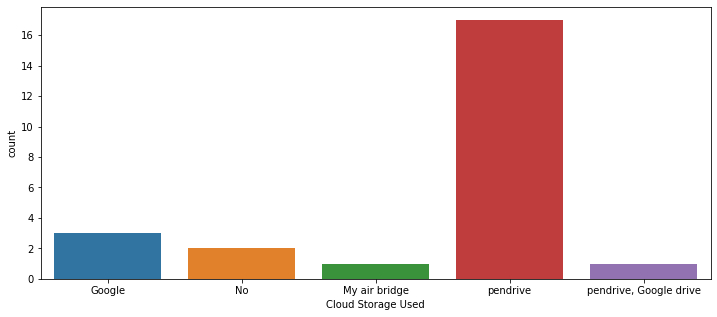

In [21]:
plt.figure(figsize=(12,5))
sns.countplot(x='Cloud Storage Used',data=photo_data)
plt.show()

## Pendrive has been used the most for cloud storage.

## Finding monthly cost of internet for each type of photography service

In [22]:
photo_data['Internet (Monthly Cost)'] = pd.to_numeric(photo_data['Internet (Monthly Cost)'],errors='coerce')

In [23]:
photo_data.groupby('Type')['Internet (Monthly Cost)'].max().sort_values(ascending=False)

Type
· Wedding photographer        1600.0
· Photographer                1200.0
· Photography studio          1000.0
· Photography service          999.0
· Advertising Photographer       NaN
· Digital printer                NaN
· Event management company       NaN
· Photo lab                      NaN
· Tour operator                  NaN
· Website designer               NaN
Name: Internet (Monthly Cost), dtype: float64

In [25]:
photo_data['Album Designing'] = photo_data['Album Designing'].astype(np.float64)
photo_data['Provides E-book? '] = photo_data['Provides E-book? '].astype(np.float64)
photo_data['Internet (Monthly Cost)'] = photo_data['Internet (Monthly Cost)'].astype(np.float64)

In [26]:
photo_data = photo_data[photo_data['Internet (Speed)']!="No"]

In [27]:
for x in photo_data['Internet (Speed)']:
    if type(x) == str:
        photo_data['Internet (Speed)'].replace(x,re.search('\d+',x).group(),inplace=True)

In [29]:
photo_data['Internet (Speed)'] = photo_data['Internet (Speed)'].astype(np.float64)

In [31]:
photo_data = photo_data[photo_data['Internet']!=91.0]

In [33]:
photo_data['Internet'] = photo_data['Internet'].astype(np.float64)

In [34]:
photo_data['No. of Employees in Studio'] = photo_data['No. of Employees in Studio'].astype(np.float64)

In [35]:
photo_data['Monthly Orders'] = pd.to_numeric(photo_data['Monthly Orders'],errors='coerce')

In [36]:
photo_data['Monthly Orders'].value_counts()

0.0     12
4.0      2
40.0     1
3.0      1
10.0     1
2.0      1
Name: Monthly Orders, dtype: int64

In [37]:
photo_data['Monthly Orders'] = photo_data['Monthly Orders'].astype(np.float64)

## As we have obtained all the numeric datatype columns in the dataset, so we can now observe their correlations.

In [39]:
photo_data.corr()

,Internet,No. of Employees in Studio,Monthly Orders,Internet (Speed),Internet (Monthly Cost),Provides E-book?,Album Designing
Internet,1.000000,0.203601,0.076835,0.031727,-0.248808,-0.196116,0.200446
No. of Employees in Studio,0.203601,1.000000,0.692461,0.094608,-0.172569,0.194441,0.096796
Monthly Orders,0.076835,0.692461,1.000000,0.396102,-0.020110,0.030006,-0.161832
Internet (Speed),0.031727,0.094608,0.396102,1.000000,0.406943,0.086835,-0.203569
Internet (Monthly Cost),-0.248808,-0.172569,-0.020110,0.406943,1.000000,-0.104511,-0.240037
Provides E-book?,-0.196116,0.194441,0.030006,0.086835,-0.104511,1.000000,0.288278
Album Designing,0.200446,0.096796,-0.161832,-0.203569,-0.240037,0.288278,1.000000


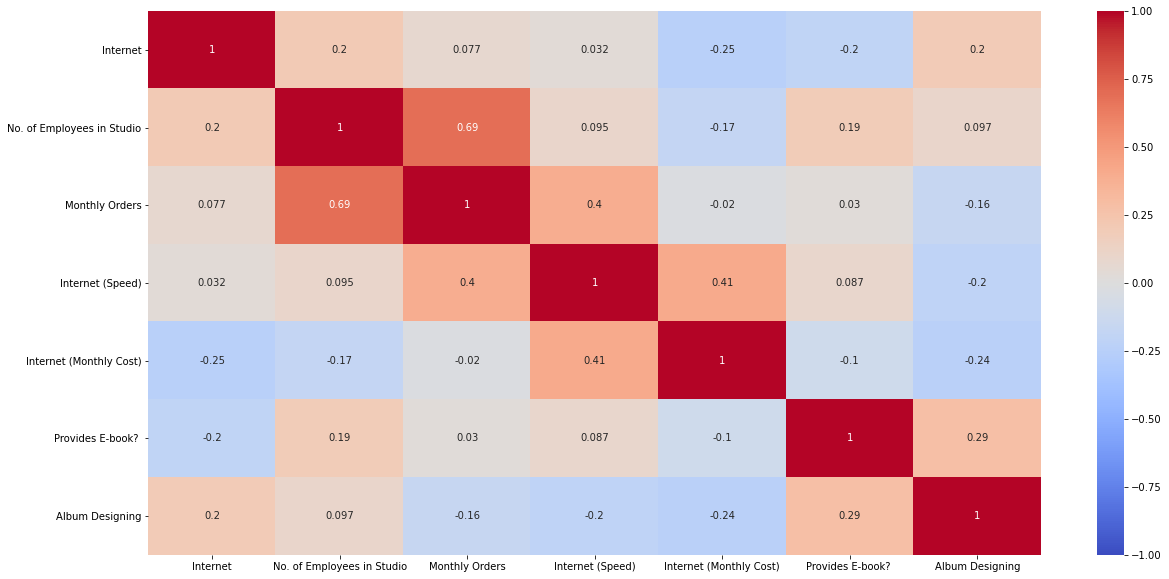

In [40]:
plt.figure(figsize=(20,10))
sns.heatmap(photo_data.corr(),annot=True,vmin=-1,vmax=1,cmap='coolwarm')
plt.show()

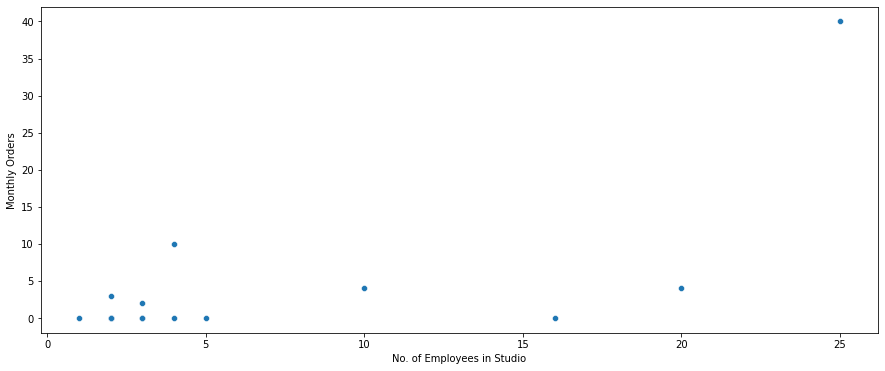

In [286]:
plt.figure(figsize=(15,6))
sns.scatterplot(x='No. of Employees in Studio',y='Monthly Orders',data=photo_data)
plt.show()

## From the above scatter plot, we can clearly observe that no. of employees in studio is strongly related to monthly orders.

## Regression Analysis

In [42]:
X = photo_data['No. of Employees in Studio']
Y = photo_data['Monthly Orders']

In [43]:
frame = {'No. of Employees in Studio': X, 'Monthly Orders': Y}

In [44]:
df = pd.DataFrame(frame)
df.head()

,No. of Employees in Studio,Monthly Orders
0,18.0,NaN
1,NaN,NaN
2,15.0,NaN
3,NaN,NaN
4,NaN,NaN


In [45]:
df.dropna(inplace=True)
df.reset_index(drop=True,inplace=True)

In [46]:
df

,No. of Employees in Studio,Monthly Orders
0,10.0,4.0
1,16.0,0.0
2,5.0,0.0
3,25.0,40.0
4,1.0,0.0
5,2.0,0.0
6,2.0,3.0
7,3.0,0.0
8,3.0,0.0
9,20.0,4.0


In [47]:
Y = df['Monthly Orders']
X = df['No. of Employees in Studio']

In [48]:
X1 = sm.add_constant(X)
reg = sm.OLS(Y,X1).fit()

In [49]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Monthly Orders   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     12.90
Date:                Thu, 23 Sep 2021   Prob (F-statistic):            0.00295
Time:                        19:29:21   Log-Likelihood:                -53.788
No. Observations:                  16   AIC:                             111.6
Df Residuals:                      14   BIC:                             113.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -2.1813      2.526     -0.864      0.402      -7.599       3.237
No. of Employees in Studio     0.9414      0.262      3.591      0.003       0.379       1.504
==============================================================================
Omnibus:                        5.329   Durbin-Watson:                   1.808
Prob(Omnibus):                  0.070   Jarque-Bera (JB):                2.748
Skew:                           0.535   Prob(JB):                        0.253
Kurtosis:                       4.726   Cond. No.                         13.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## The considerably high R-squared value obtained from the regression model indicates that no. of employees in a company can strongly explain the no. of monthly orders i.e. it has strong explanatory power.

## Predicting the no. of monthly orders for a random number of employees

## For 80 employees, no. of monthly orders:

In [50]:
-2.1813 + 0.9414*80

73.1307

## For 58 employees, no. of monthly orders:

In [51]:
-2.1813 + 0.9414*58

52.4199

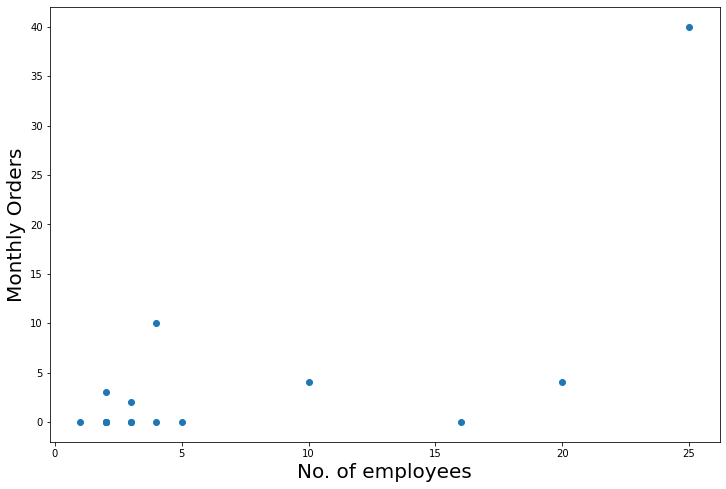

In [52]:
plt.figure(figsize=(12,8))
plt.scatter(X,Y)
plt.xlabel('No. of employees',fontsize=20)
plt.ylabel('Monthly Orders',fontsize=20)
plt.show()

In [53]:
slope, intercept, r_value, p_value, std_err = stats.linregress(X,Y)

In [54]:
slope

0.941358024691358

In [55]:
intercept

-2.1813271604938267

In [56]:
r_value**2

0.47950264712264895

In [57]:
p_value

0.002949024241340896

In [58]:
std_err

0.2621226617176865

In [59]:
def fitline(b):
    return intercept + slope*b

In [60]:
line = fitline(X)

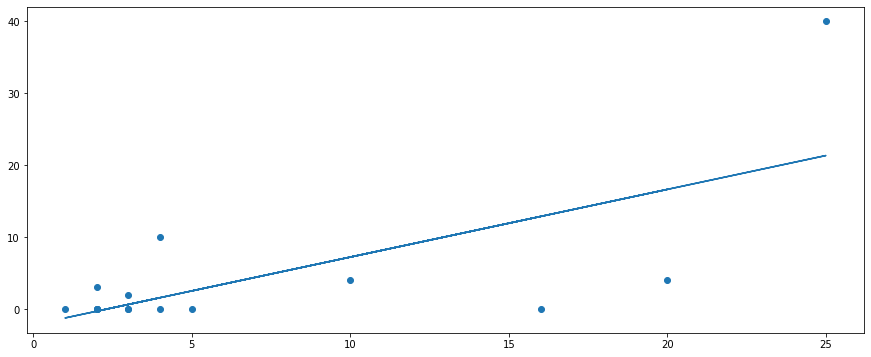

In [61]:
plt.figure(figsize=(15,6))
plt.scatter(X,Y)
plt.plot(X,line)
plt.show()

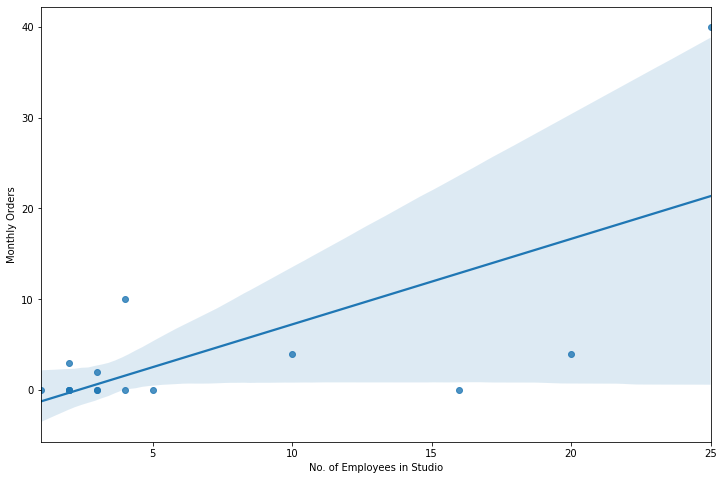

In [62]:
plt.figure(figsize=(12,8))
sns.regplot(x='No. of Employees in Studio',y='Monthly Orders',data=photo_data)
plt.show()

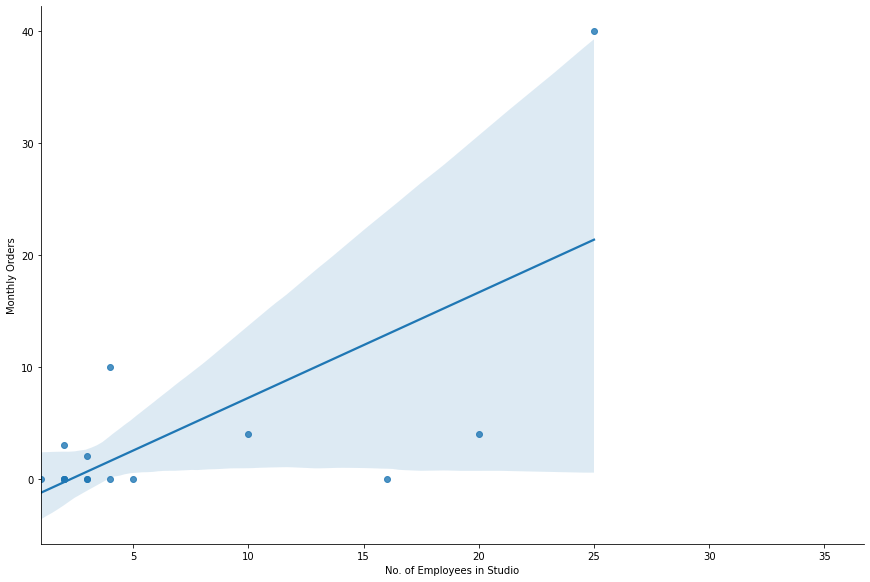

In [63]:
sns.lmplot(x='No. of Employees in Studio',y='Monthly Orders',data=photo_data,height=8,aspect=1.5)
plt.show()

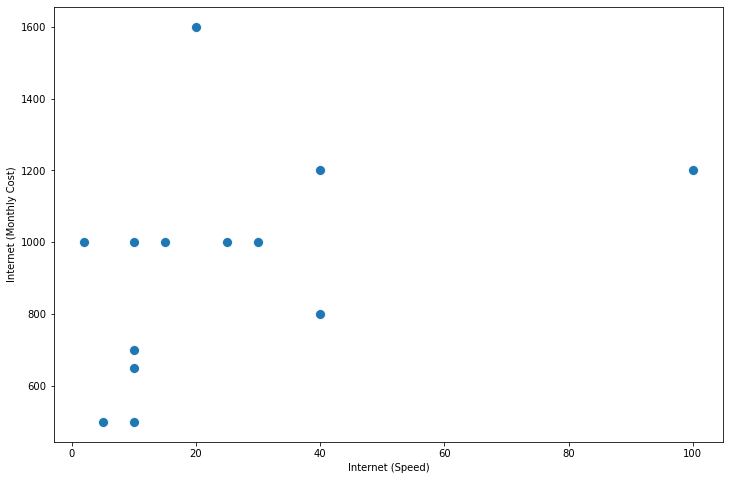

In [64]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Internet (Speed)',y='Internet (Monthly Cost)',data=photo_data,palette='plasma',s=100)
plt.show()

## By looking at the above scatter plot, we can infer that there is mild positive correlation between the speed of internet and it's monthly cost i.e. more is the monthly cost of internet, higher will be it's speed and vice versa.

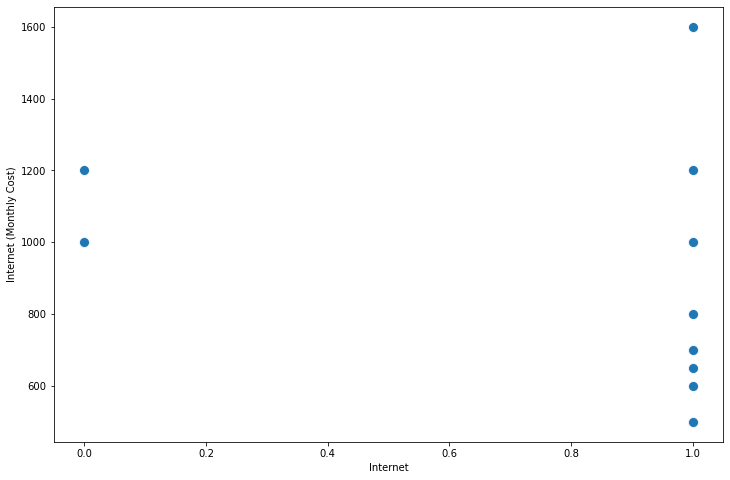

In [65]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Internet',y='Internet (Monthly Cost)',data=photo_data,palette='Accent',s=100)
plt.show()

## On observing the above scatter plot, we can easily infer that there is some negative correlation between internet and it's monthly costs i.e. higher the monthly cost of Internet, lesser will be the probability of those internet services to be availed and vice versa.

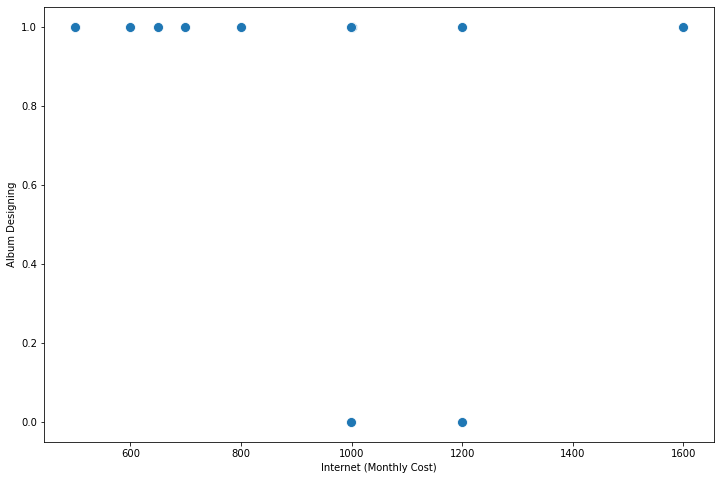

In [66]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Internet (Monthly Cost)',y='Album Designing',data=photo_data,s=100)
plt.show()

## The above scatter plot clearly indicates that there is mild negative correlation between monthly cost of internet and album designing i.e. higher the monthly cost of internet, lower will be the probability of an album to be designed and vice versa.

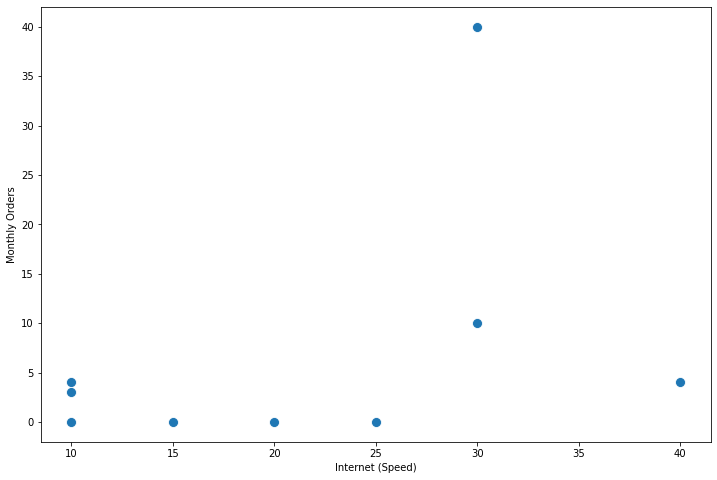

In [67]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Internet (Speed)',y='Monthly Orders',data=photo_data,palette='spectral',s=100)
plt.show()

## The above scatter plot suggests that there is mild positive correlation between internet speed and no. of monthly orders i.e. higher is the speed of internet, more will be the no. of monthly orders received and vice versa.

# Exploratory Data Analysis

## Univariate Analysis

Mean of Internet =  0.72
Maximum value of Internet =  1.0
Minimum value of Internet =  0.0
Median of Internet =  1.0
Mode of Internet =  0    1.0
dtype: float64
Skewness of Internet =  -1.01
Kurtosis of Internet =  -0.99
KDE plot of Internet: 


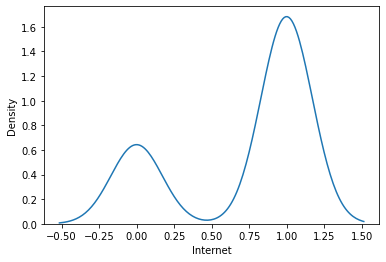

----------
Mean of No. of Employees in Studio =  7.55
Maximum value of No. of Employees in Studio =  35.0
Minimum value of No. of Employees in Studio =  1.0
Median of No. of Employees in Studio =  4.0
Mode of No. of Employees in Studio =  0    2.0
dtype: float64
Skewness of No. of Employees in Studio =  1.79
Kurtosis of No. of Employees in Studio =  3.16
KDE plot of No. of Employees in Studio: 


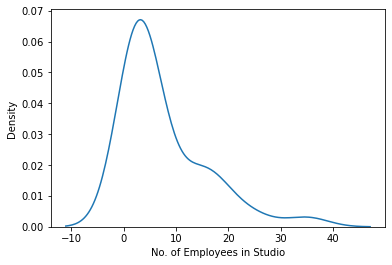

----------
Mean of Monthly Orders =  3.5
Maximum value of Monthly Orders =  40.0
Minimum value of Monthly Orders =  0.0
Median of Monthly Orders =  0.0
Mode of Monthly Orders =  0    0.0
dtype: float64
Skewness of Monthly Orders =  3.77
Kurtosis of Monthly Orders =  14.93
KDE plot of Monthly Orders: 


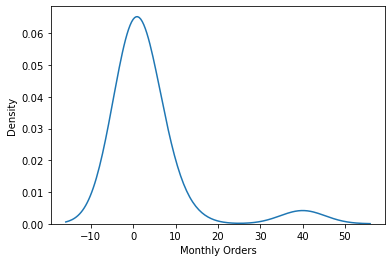

----------
Mean of Internet (Speed) =  22.53
Maximum value of Internet (Speed) =  100.0
Minimum value of Internet (Speed) =  2.0
Median of Internet (Speed) =  15.0
Mode of Internet (Speed) =  0    10.0
dtype: float64
Skewness of Internet (Speed) =  2.6
Kurtosis of Internet (Speed) =  8.15
KDE plot of Internet (Speed): 


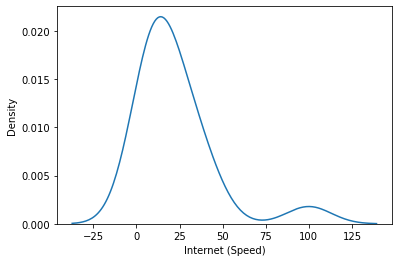

----------
Mean of Internet (Monthly Cost) =  921.5
Maximum value of Internet (Monthly Cost) =  1600.0
Minimum value of Internet (Monthly Cost) =  499.0
Median of Internet (Monthly Cost) =  999.5
Mode of Internet (Monthly Cost) =  0    1000.0
dtype: float64
Skewness of Internet (Monthly Cost) =  0.45
Kurtosis of Internet (Monthly Cost) =  0.64
KDE plot of Internet (Monthly Cost): 


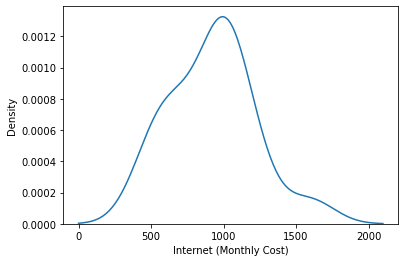

----------
Mean of Provides E-book?  =  0.87
Maximum value of Provides E-book?  =  1.0
Minimum value of Provides E-book?  =  0.0
Median of Provides E-book?  =  1.0
Mode of Provides E-book?  =  0    1.0
dtype: float64
Skewness of Provides E-book?  =  -2.27
Kurtosis of Provides E-book?  =  3.39
KDE plot of Provides E-book? : 


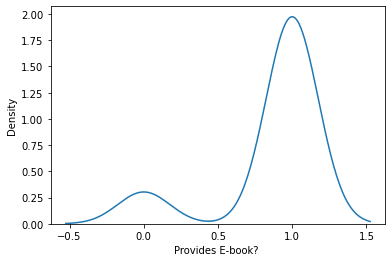

----------
Mean of Album Designing =  0.93
Maximum value of Album Designing =  1.0
Minimum value of Album Designing =  0.0
Median of Album Designing =  1.0
Mode of Album Designing =  0    1.0
dtype: float64
Skewness of Album Designing =  -3.66
Kurtosis of Album Designing =  12.21
KDE plot of Album Designing: 


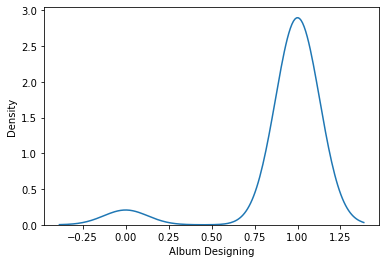

----------


In [68]:
for col in photo_data.columns:
    if type(photo_data[col][0]) == np.float64:
        print('Mean of {} = '.format(col),np.round(photo_data[col].mean(),2))
        print('Maximum value of {} = '.format(col),photo_data[col].max())
        print('Minimum value of {} = '.format(col),photo_data[col].min())
        print('Median of {} = '.format(col),photo_data[col].median())
        print('Mode of {} = '.format(col),photo_data[col].mode())
        print('Skewness of {} = '.format(col),np.round(photo_data[col].skew(),2))
        print('Kurtosis of {} = '.format(col),np.round(photo_data[col].kurtosis(),2))
        print('KDE plot of {}: '.format(col))
        plt.figure(figsize=(6,4))
        sns.kdeplot(x=col,data=photo_data,palette='plasma')
        plt.show()
        print('----------')

## Let's analyze the 'Comment' column.

In [69]:
comments = photo_data['Comment'].value_counts().sort_values(ascending=False).reset_index()[:10]
comments.columns = ['Comment','Count']
comments

,Comment,Count
0,not connected,18
1,not interested,12
2,no issues,5
3,Interested,5
4,responded,5
5,left the business,3
6,not intersted,3
7,he cut the call,2
8,busy,2
9,different business,2


In [70]:
values = photo_data['Type'].value_counts().values
values

array([43, 33, 27,  9,  5,  2,  1,  1,  1,  1], dtype=int64)

In [71]:
df = pd.DataFrame({'Type': values})
df.index = photo_data['Type'].value_counts().keys()
df = df.sort_values(by='Type',ascending=False)
df['Cumulative Percentage'] = df['Type'].cumsum()/df['Type'].sum()*100

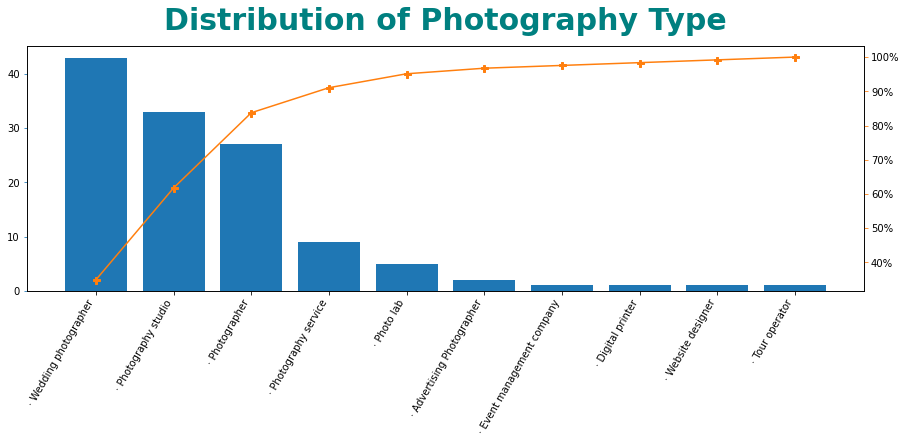

In [72]:
fig, ax = plt.subplots(figsize=(15,5))
ax.bar(df.index,df['Type'],color='C0')
ax2 = ax.twinx()
ax2.plot(df.index,df['Cumulative Percentage'],color='C1',marker='P',ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())
ax.tick_params(axis='y',color='C0')
# ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
fig.autofmt_xdate(rotation=60)
ax2.tick_params(axis='y',color='C1')
plt.title('Distribution of Photography Type',fontsize=30,color='teal',fontweight='bold',pad=16)
plt.show()

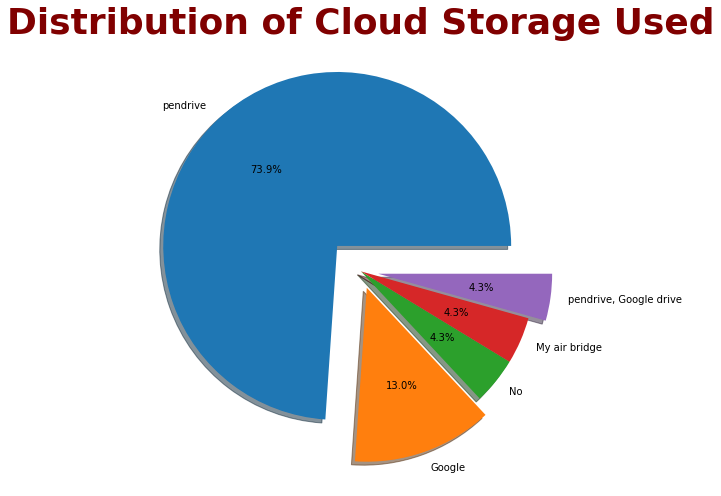

In [73]:
plt.figure(figsize=(8,8))
values = photo_data['Cloud Storage Used'].value_counts().values
labels = photo_data['Cloud Storage Used'].value_counts().keys()
explode = (0.2,0.1,0,0,0.1)
plt.pie(values,labels=labels,explode=explode,shadow=True,autopct='%1.1f%%')
plt.title('Distribution of Cloud Storage Used',fontsize=36,fontweight='bold',color='maroon',pad=20)
plt.show()

## Pendrive has been used as a cloud storage solution 73.9% of times, while Google has been used 13% of times as cloud storage provider.

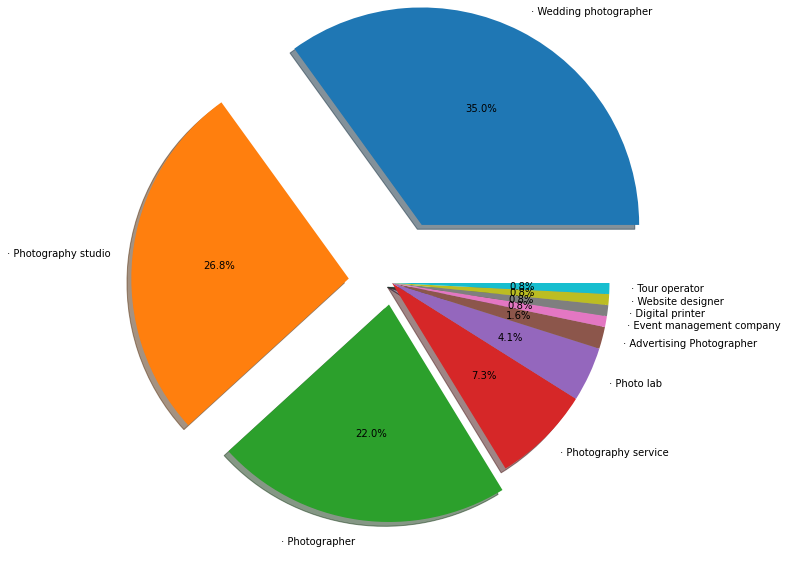

In [265]:
plt.figure(figsize=(16,10))
values = photo_data['Type'].value_counts().values
labels = photo_data['Type'].value_counts().keys()
explode = (0.3,0.2,0.1,0,0,0,0,0,0,0)
plt.pie(values,labels=labels,explode=explode,shadow=True,autopct='%1.1f%%')
plt.show()

## Wedding photographers are highly in demand as they account for 35% of the total population of photographers.  They are followed by photography studios and photography companies which account for 26.8% and 22% respectively.

In [75]:
problems = photo_data['Problems'].value_counts().sort_values(ascending=False).dropna().reset_index()
problems.columns = ['Problems','Count']
problems

,Problems,Count
0,Affect on orders due to Covid,1
1,No work due to Covid,1
2,Fall in orders,1
3,No,1
4,due to Covid,1
5,due to Covid,1
6,not getting client's,1
7,not work,1
8,postponed due to Covid,1


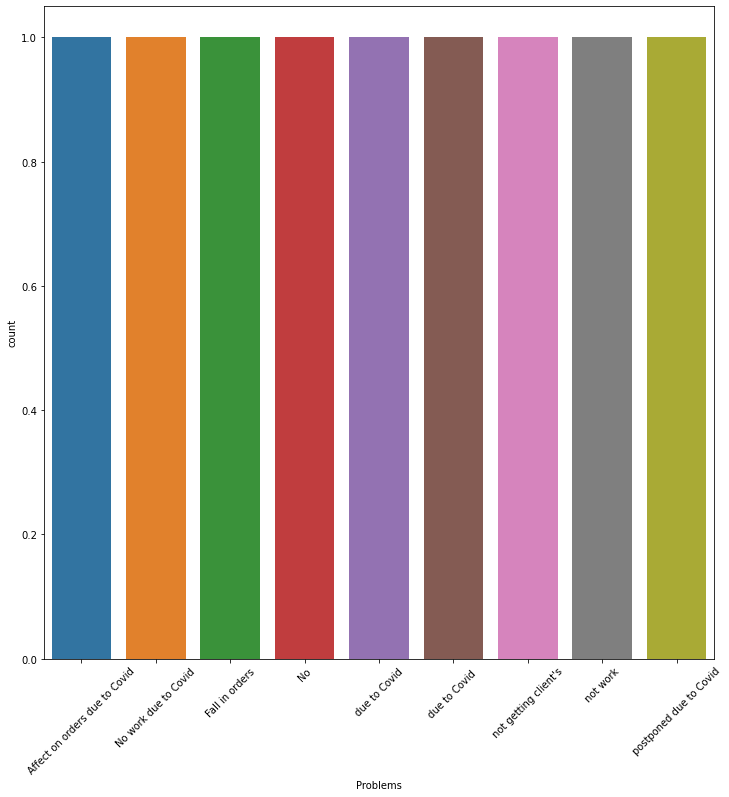

In [76]:
plt.figure(figsize=(12,12))
sns.countplot(photo_data['Problems'])
plt.xticks(rotation=45)
plt.show()

## All the given problems have occurred once among all the photography companies.

In [279]:
comments = photo_data['Comment'].value_counts().sort_values(ascending=False).dropna().reset_index()[:10]
comments.columns = ['Comment','Count']
comments

,Comment,Count
0,not connected,18
1,not interested,12
2,no issues,5
3,Interested,5
4,responded,5
5,left the business,3
6,not intersted,3
7,he cut the call,2
8,busy,2
9,different business,2


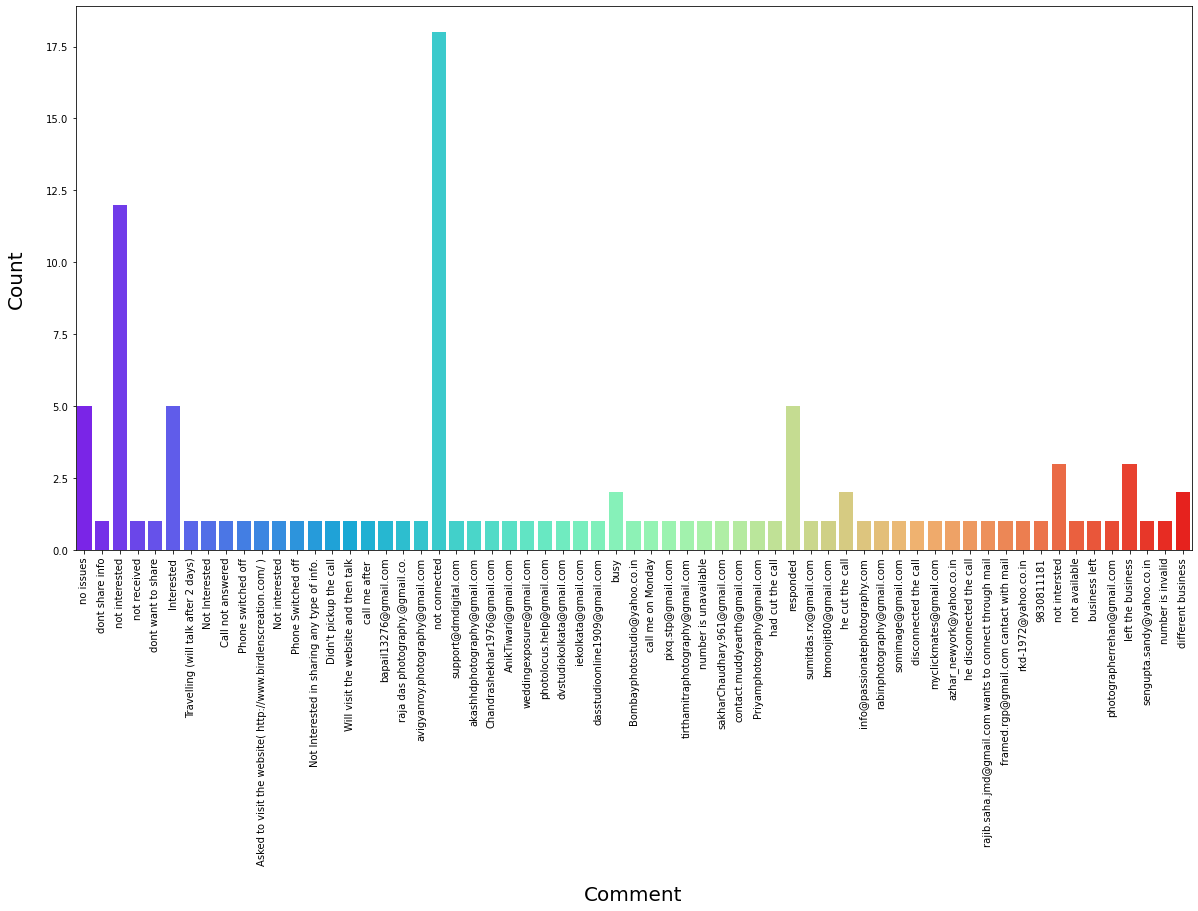

In [285]:
plt.figure(figsize=(20,10))
sns.countplot(photo_data['Comment'],palette='rainbow',saturation=0.80)
plt.xticks(rotation=90)
plt.xlabel('Comment',fontsize=20,labelpad=20)
plt.ylabel('Count',fontsize=20,labelpad=20)
plt.show()

## Majority of the customers haven't contacted photography companies yet. 
## Second major comment is "Not Interested" i.e. a considerable number of customers have not been interested in the photography services.

# Bivariate Analysis

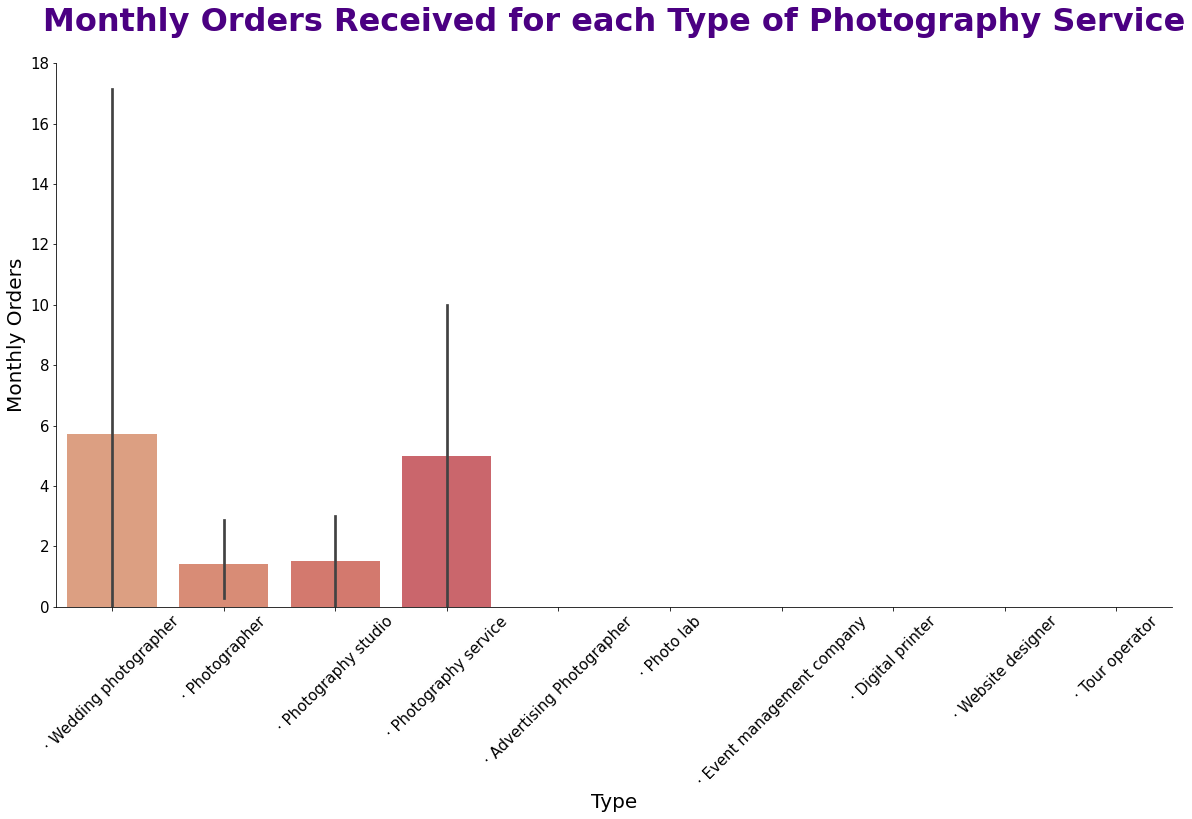

In [77]:
sns.barplot(x='Type',y='Monthly Orders',data=photo_data,palette='flare')
plt.xticks(fontsize=15,rotation=45)
plt.yticks(fontsize=15)
plt.xlabel('Type',fontsize=20)
plt.ylabel('Monthly Orders',fontsize=20)
sns.despine()
plt.title('Monthly Orders Received for each Type of Photography Service',fontsize=32,color='indigo',pad=32,fontweight='bold')
plt.show()

## Wedding photography companies have received the maximum no. of orders per month while photography companies have received the minimum no. of monthly orders.

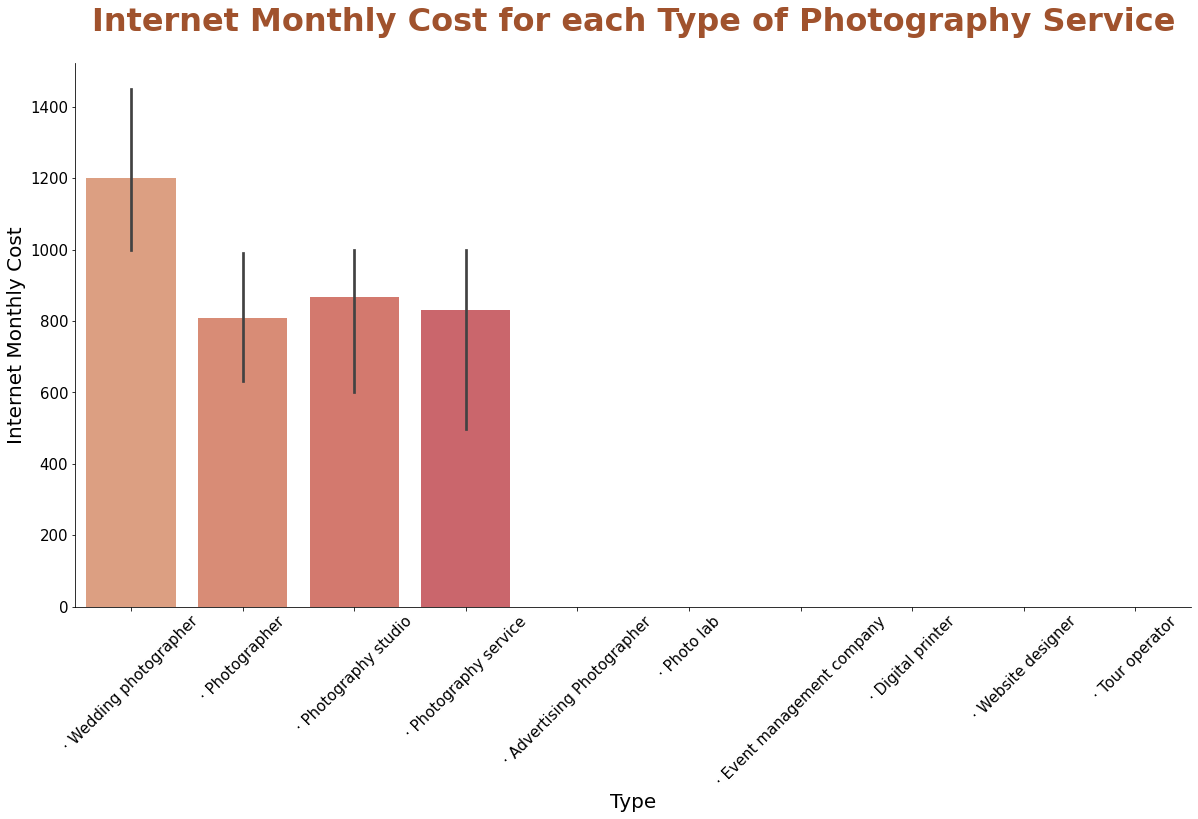

In [78]:
sns.barplot(x='Type',y='Internet (Monthly Cost)',data=photo_data,palette='flare')
plt.xticks(fontsize=15,rotation=45)
plt.yticks(fontsize=15)
plt.xlabel('Type',fontsize=20)
plt.ylabel('Internet Monthly Cost',fontsize=20)
sns.despine()
plt.title('Internet Monthly Cost for each Type of Photography Service',fontsize=32,color='sienna',pad=32,fontweight='bold')
plt.show()

## Wedding photography companies have the highest internet monthly cost while photography companies have the lowest of that.

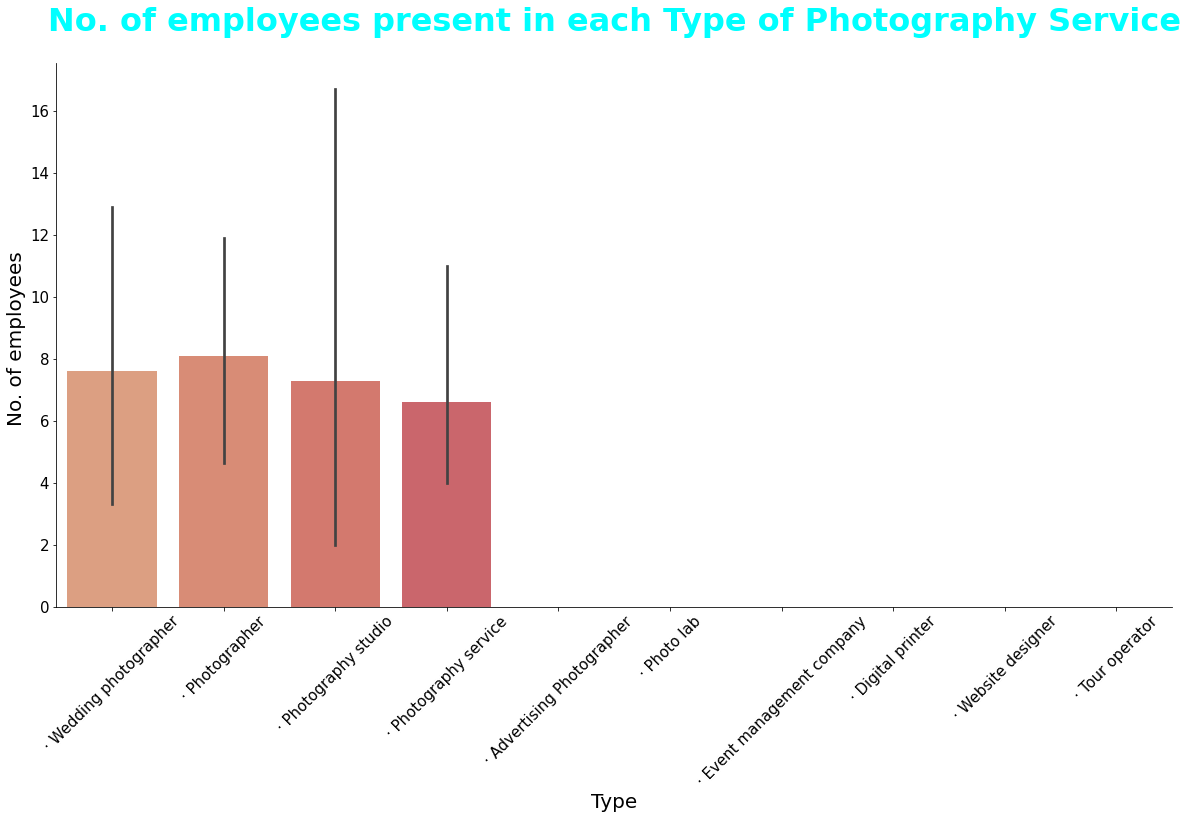

In [79]:
sns.barplot(x='Type',y='No. of Employees in Studio',data=photo_data,palette='flare')
plt.xticks(fontsize=15,rotation=45)
plt.yticks(fontsize=15)
plt.xlabel('Type',fontsize=20)
plt.ylabel('No. of employees ',fontsize=20)
sns.despine()
plt.title('No. of employees present in each Type of Photography Service',fontsize=32,color='cyan',pad=32,fontweight='bold')
plt.show()

## Photography companies have the maximum number of employees while photography service companies have the minimum no. of employees.

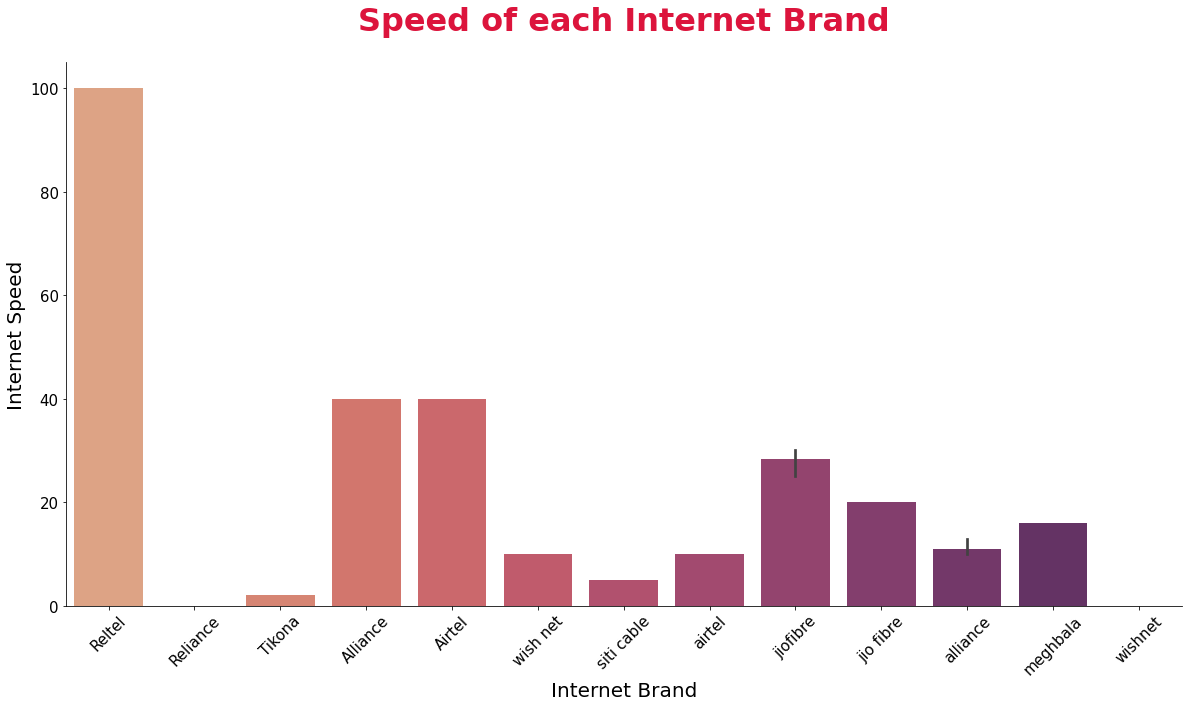

In [80]:
sns.barplot(x='Internet (Brand)',y='Internet (Speed)',data=photo_data,palette='flare')
plt.xticks(fontsize=15,rotation=45)
plt.yticks(fontsize=15)
plt.xlabel('Internet Brand',fontsize=20)
plt.ylabel('Internet Speed',fontsize=20)
sns.despine()
plt.title('Speed of each Internet Brand',fontsize=32,color='crimson',pad=32,fontweight='bold')
plt.show()

## Reltel brand has the highest speed of internet while Tikona has the least internet speed.

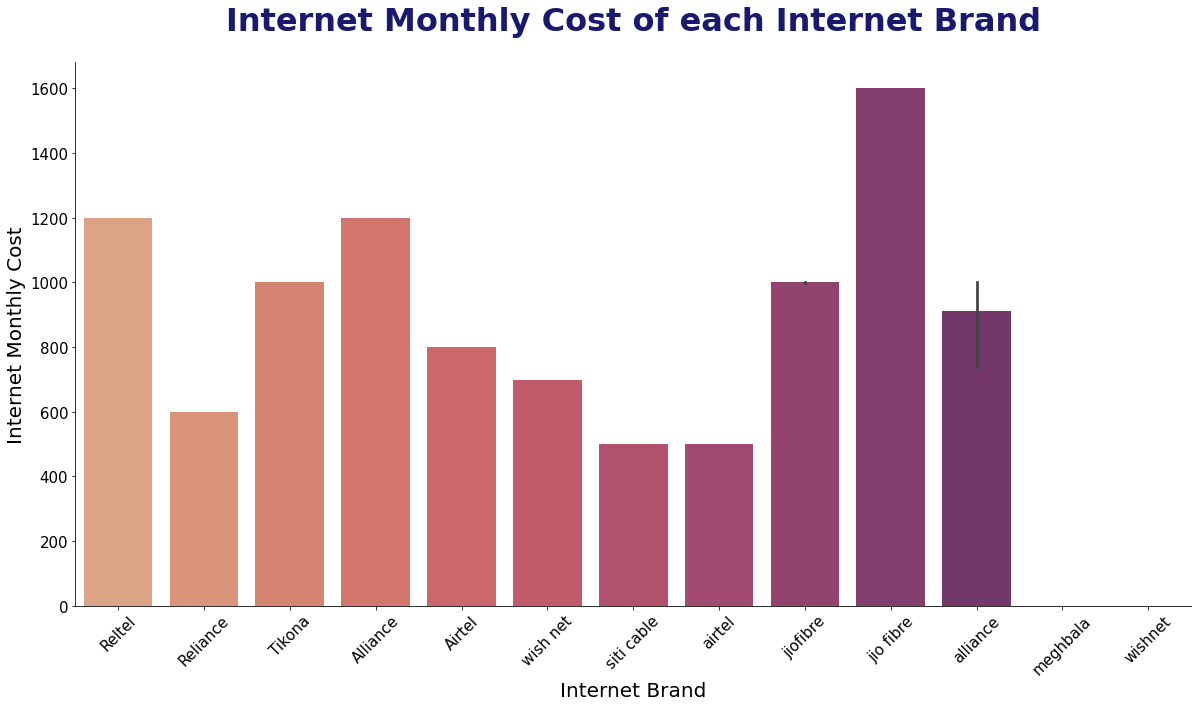

In [81]:
sns.barplot(x='Internet (Brand)',y='Internet (Monthly Cost)',data=photo_data,palette='flare')
plt.xticks(fontsize=15,rotation=45)
plt.yticks(fontsize=15)
plt.xlabel('Internet Brand',fontsize=20)
plt.ylabel('Internet Monthly Cost',fontsize=20)
sns.despine()
plt.title('Internet Monthly Cost of each Internet Brand',fontsize=32,color='midnightblue',pad=32,fontweight='bold')
plt.show()

## Jio Fibre has the highest internet monthly cost while Siti Cable and Airtel have the minimum of that.

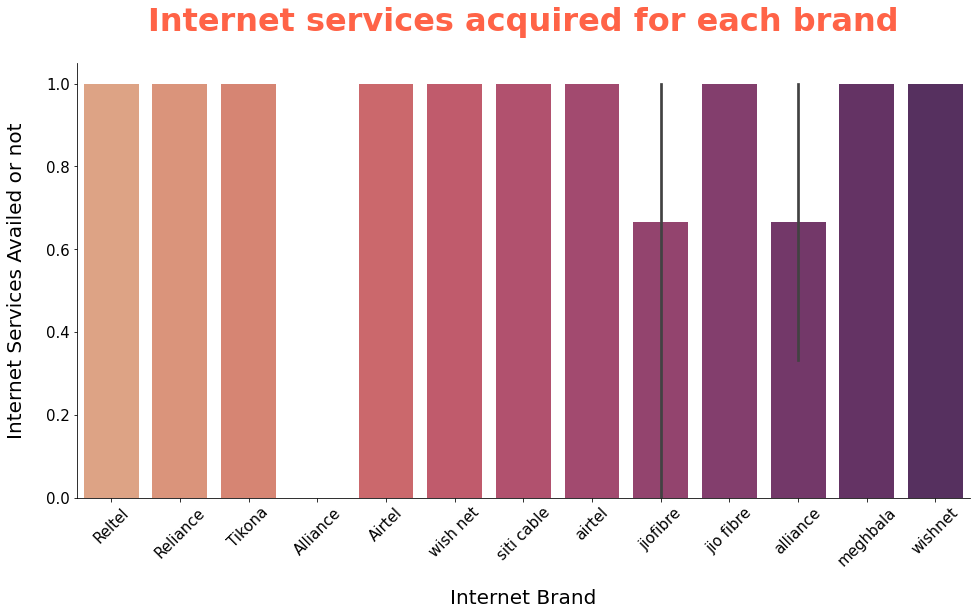

In [273]:
plt.figure(figsize=(16,8))
sns.barplot(x='Internet (Brand)',y='Internet',data=photo_data,palette='flare')
plt.xticks(fontsize=15,rotation=45)
plt.yticks(fontsize=15)
plt.xlabel('Internet Brand',fontsize=20,labelpad=20)
plt.ylabel('Internet Services Availed or not',fontsize=20,labelpad=20)
sns.despine()
plt.title('Internet services acquired for each brand',fontsize=32,color='tomato',pad=32,fontweight='bold')
plt.show()

## Only Alliance internet brand hasn't been availed by anyone, rest all have been acquired atleast once.

In [85]:
photo_table = pd.crosstab(photo_data['Type'],photo_data['Comment'],margins=False)
photo_table.head()

Comment,9830811181,AnikTiwari@gmail.com,Asked to visit the website( http://www.birdlenscreation.com/ ),Bombayphotostudio@yahoo.co.in,Call not answered,Chandrashekhar1976@gmail.com,Didn't pickup the call,Interested,Not Interested,Not Interested in sharing any type of info.,...,rajib.saha.jmd@gmail.com wants to connect through mail,responded,rkd-1972@yahoo.co.in,sakharChaudhary.961@gmail.com,sengupta.sandy@yahoo.co.in,somimage@gmail.com,sumitdas.rx@gmail.com,support@dmdigital.com,tirthamitraphotography@gmail.com,weddingexposure@gmail.com
Type,,,,,,,,,,,,,,,,,,,,,
· Advertising Photographer,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
· Digital printer,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
· Event management company,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
· Photo lab,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
· Photographer,0,0,0,0,0,1,0,2,0,0,...,0,0,0,0,0,1,1,0,0,0


In [86]:
stat, p, dof, expected = stats.chi2_contingency(photo_table)

In [87]:
prob = 0.95
critical = stats.chi2.ppf(prob,dof)
if abs(stat) >= critical:
    print('Type and Comments are related')
else:
    print('Type and Comments are independent')

Type and Comments are independent


In [88]:
alpha = 1.0 - prob
if p <= alpha:
    print('Type and Comments are related')
else:
    print('Type and Comments are independent')

Type and Comments are independent


## Hence, we fail to reject our null hypothesis H0 that type and comments are independent.

In [89]:
photo_table = pd.crosstab(photo_data['Internet (Brand)'],photo_data['Cloud Storage Used'],margins=False)
photo_table.head()

Cloud Storage Used,Google,My air bridge,No,pendrive
Internet (Brand),,,,
Airtel,1,0,0,0
Alliance,0,1,0,0
Reliance,1,0,0,0
Reltel,1,0,0,0
Tikona,0,0,1,0


### Let's assume our null hypothesis H0 that internet brand and cloud storage are independent.

In [90]:
stat, p, dof, expected = stats.chi2_contingency(photo_table)

In [91]:
prob = 0.95
critical = stats.chi2.ppf(prob,dof)

if abs(stat) >= critical:
    print('Internet Brand and Cloud Storage are related')
else:
    print('Internet Brand and Cloud Storage are independent')

Internet Brand and Cloud Storage are related


In [92]:
alpha = 1.0 - prob

if p <= alpha:
    print('Internet Brand and Cloud Storage are related')
else:
    print('Internet Brand and Cloud Storage are independent')

Internet Brand and Cloud Storage are related


## Hence, we succeed to reject our null hypothesis H0 so it can be inferred that internet brand and cloud storage are related.

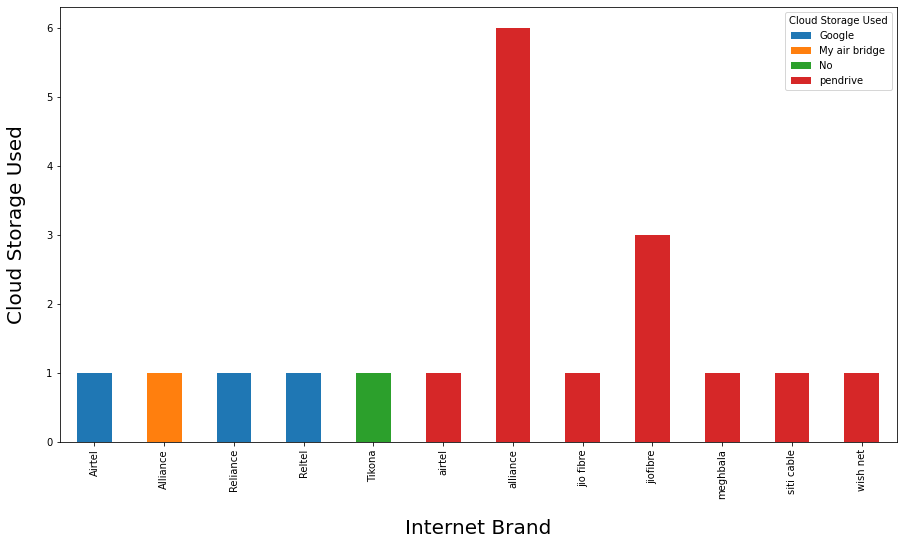

In [270]:
pd.crosstab(photo_data['Internet (Brand)'],photo_data['Cloud Storage Used']).plot(kind='bar',stacked=True,figsize=(15,8))
plt.xlabel('Internet Brand',fontsize=20,labelpad=20)
plt.ylabel('Cloud Storage Used',fontsize=20,labelpad=20)
plt.show()

## Alliance internet brand uses maximum cloud storage through pendrive.

In [94]:
orders = photo_data.groupby('Name')[['Monthly Orders','Cloud Storage Used']].max().sort_values(by='Monthly Orders',ascending=False).dropna().reset_index()[:10]
orders

,Name,Monthly Orders,Cloud Storage Used
0,The Wedding Exposure,40.0,pendrive
1,Passionate Photography,10.0,pendrive
2,DreamArt Photography- Best wedding photographe...,4.0,Google
3,Sumit Arghya Das Photography,4.0,pendrive
4,Bombay Photo Studio,3.0,pendrive
5,Somnath Roy,2.0,pendrive
6,Sen Photography,0.0,pendrive
7,The Rawshooter photography,0.0,pendrive
8,Studio New York,0.0,pendrive
9,Priyam Photography,0.0,pendrive


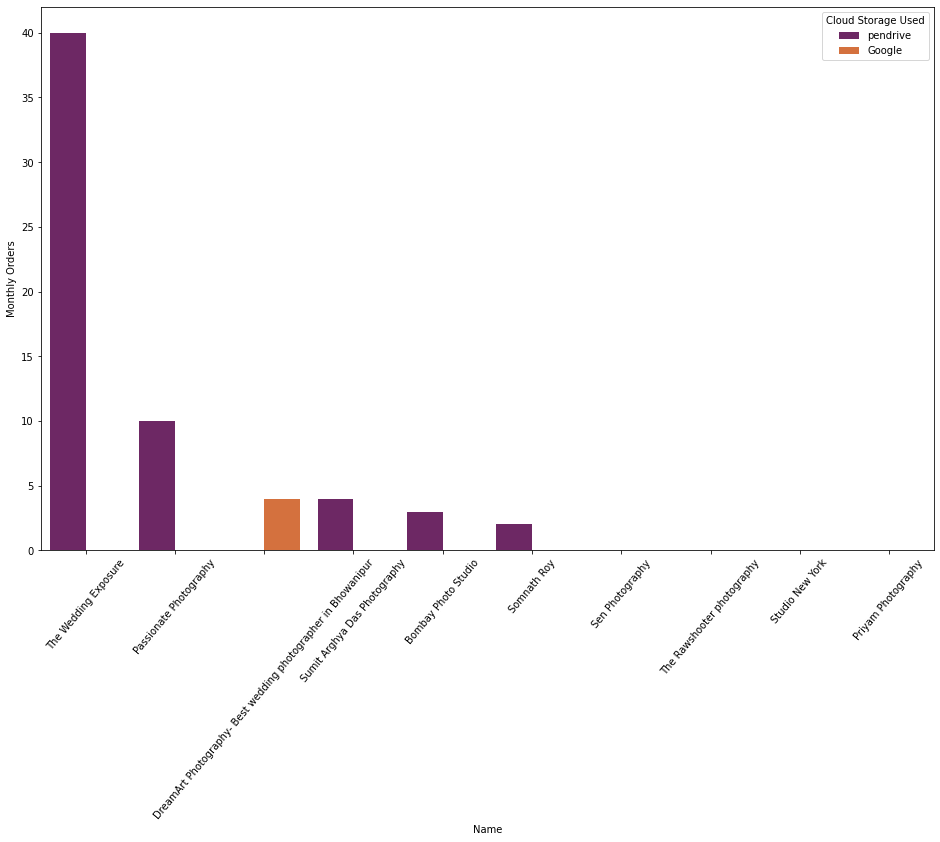

In [95]:
plt.figure(figsize=(16,10))
sns.barplot(x='Name',y='Monthly Orders',data=orders,hue=orders['Cloud Storage Used'],palette='inferno')
plt.xticks(rotation=50)
plt.show()

## The Wedding Exposure company has received the highest number of monthly orders while Somnath Roy company has received the minimum of them. There are many companies which haven't received any order yet.

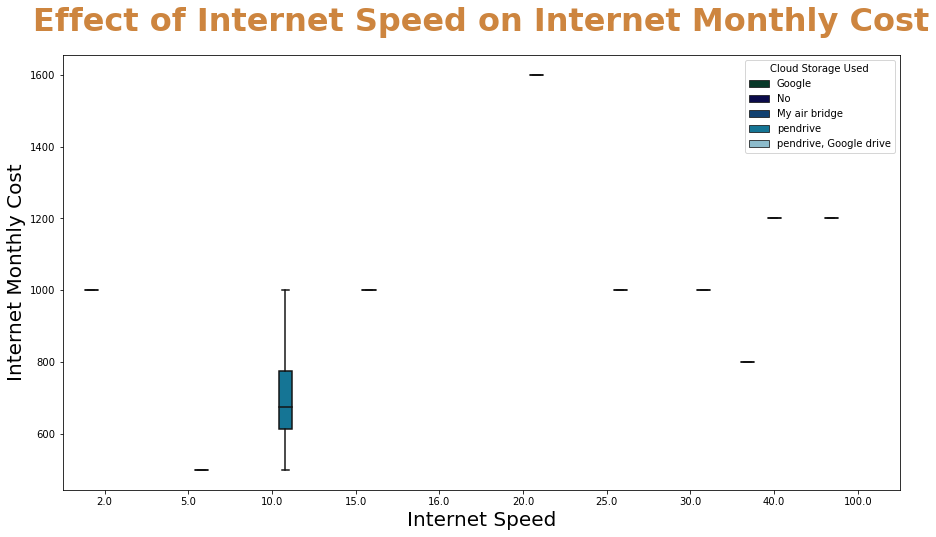

In [97]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Internet (Speed)',y='Internet (Monthly Cost)',data=photo_data,hue='Cloud Storage Used',palette='ocean')
plt.xlabel('Internet Speed',fontsize=20)
plt.ylabel('Internet Monthly Cost',fontsize=20)
plt.title('Effect of Internet Speed on Internet Monthly Cost',fontsize=32,color='peru',pad=24,fontweight='bold')
plt.show()

## By observing the above box plot, we can clearly observe that the monthly cost of Internet gets augmented on increasing the speed of network.

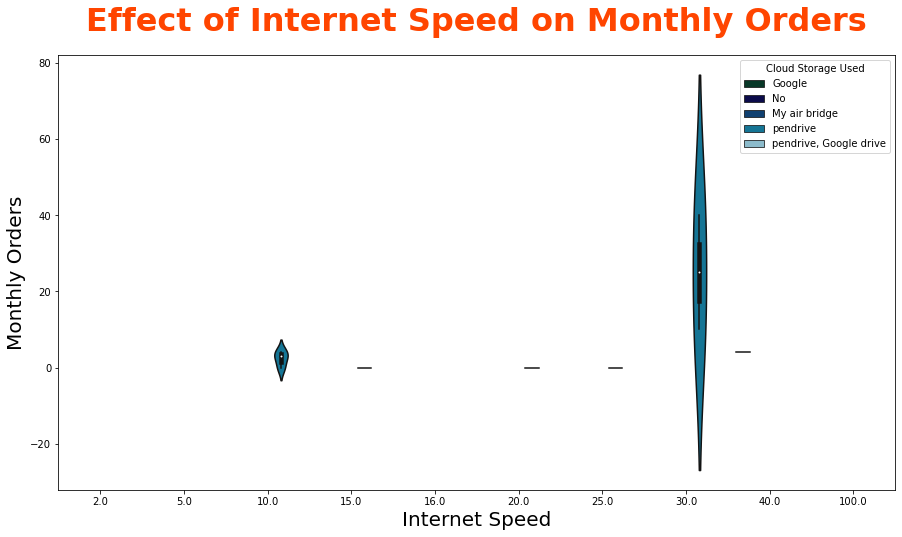

In [98]:
plt.figure(figsize=(15,8))
sns.violinplot(x='Internet (Speed)',y='Monthly Orders',data=photo_data,hue='Cloud Storage Used',palette='ocean')
plt.xlabel('Internet Speed',fontsize=20)
plt.ylabel('Monthly Orders',fontsize=20)
plt.title('Effect of Internet Speed on Monthly Orders',fontsize=32,color='orangered',pad=24,fontweight='bold')
plt.show()

## The most preferred internet speed at which people have made the maximum number of monthly orders is about 32-33 mbps. 

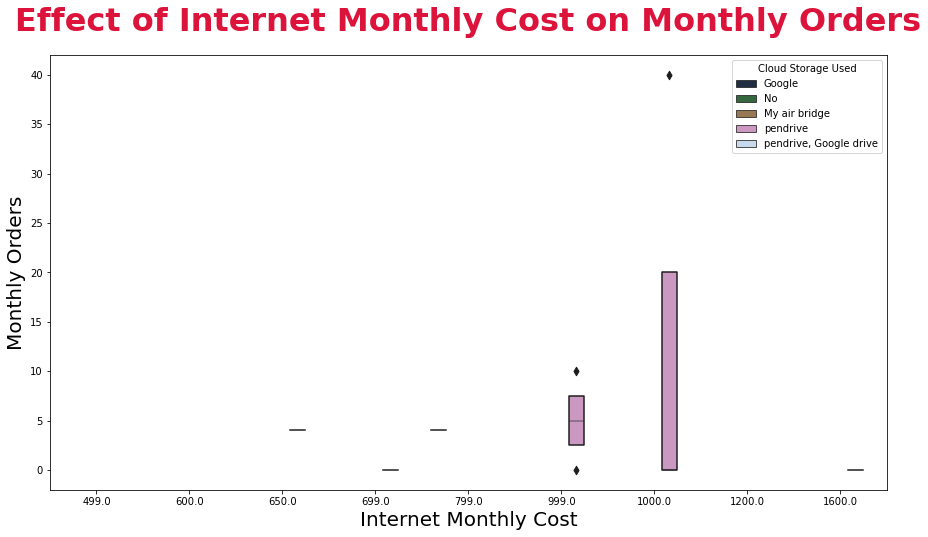

In [99]:
plt.figure(figsize=(15,8))
sns.boxenplot(x='Internet (Monthly Cost)',y='Monthly Orders',data=photo_data,hue='Cloud Storage Used',palette='cubehelix')
plt.xlabel('Internet Monthly Cost',fontsize=20)
plt.ylabel('Monthly Orders',fontsize=20)
plt.title('Effect of Internet Monthly Cost on Monthly Orders',fontsize=32,color='crimson',pad=24,fontweight='bold')
plt.show()

## Majority of the customers have taken an expensive internet monthly plan in the range of ₹1200-1400 in their photography orders.

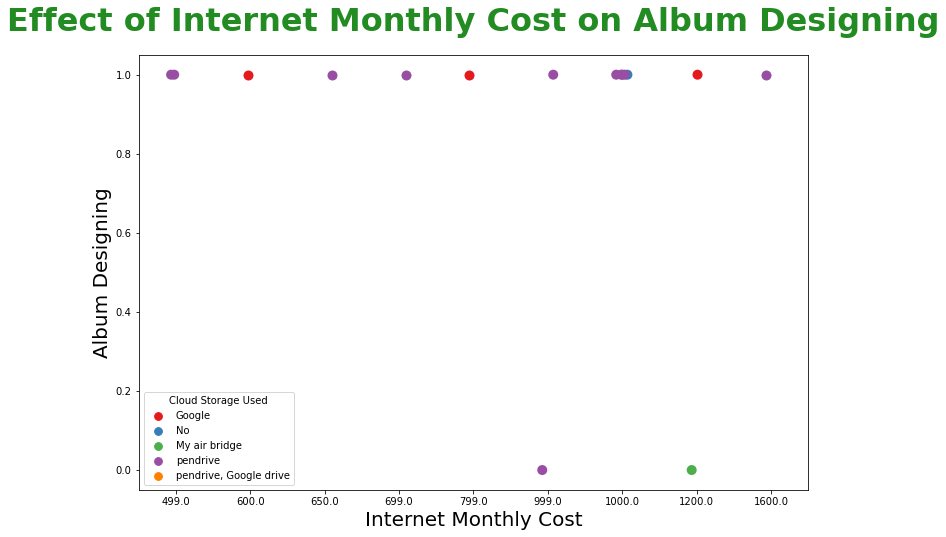

In [100]:
plt.figure(figsize=(12,8))
sns.stripplot(x='Internet (Monthly Cost)',y='Album Designing',data=photo_data,hue='Cloud Storage Used',palette='Set1',s=10)
plt.xlabel('Internet Monthly Cost',fontsize=20)
plt.ylabel('Album Designing',fontsize=20)
plt.title('Effect of Internet Monthly Cost on Album Designing',fontsize=32,color='forestgreen',pad=24,fontweight='bold')
plt.show()

## Customers using either Google or Pendrive for cloud storage have mainly ordered for albums to be designed.

In [101]:
top_10_ib = photo_data.groupby('Internet (Brand)')['Internet'].count().sort_values(ascending=False).dropna().reset_index()[:10]
top_10_ib

,Internet (Brand),Internet
0,alliance,6
1,jiofibre,3
2,siti cable,2
3,Airtel,1
4,Alliance,1
5,Reliance,1
6,Reltel,1
7,Tikona,1
8,airtel,1
9,jio fibre,1


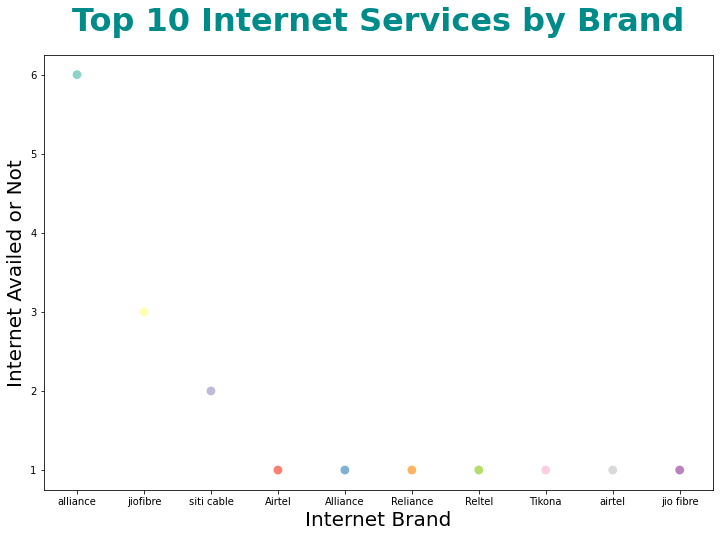

In [102]:
plt.figure(figsize=(12,8))
sns.pointplot(x='Internet (Brand)',y='Internet',data=top_10_ib,palette='Set3',s=10)
plt.xlabel('Internet Brand',fontsize=20)
plt.ylabel('Internet Availed or Not',fontsize=20)
plt.title('Top 10 Internet Services by Brand',fontsize=32,color='darkcyan',pad=24,fontweight='bold')
plt.show()

## Customers have bought the Alliance brand's internet network the most number of times so it is the most popular internet network.

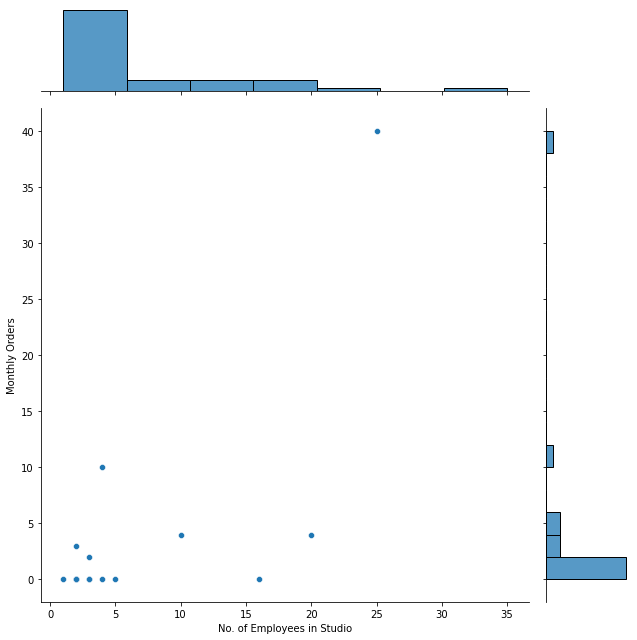

In [119]:
sns.jointplot(x='No. of Employees in Studio',y='Monthly Orders',data=photo_data,height=9)
plt.show()

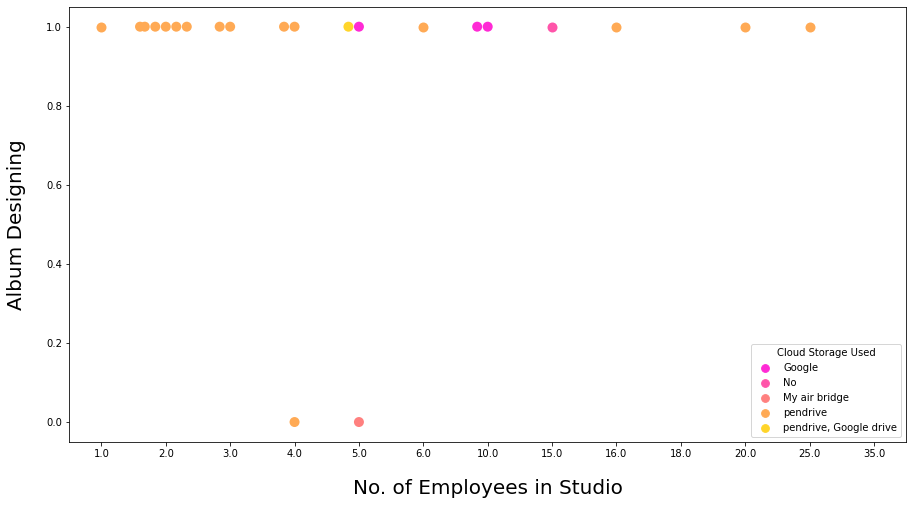

In [165]:
plt.figure(figsize=(15,8))
sns.swarmplot(x='No. of Employees in Studio',y='Album Designing',data=photo_data,hue='Cloud Storage Used',palette='spring',s=10)
plt.xlabel('No. of Employees in Studio',fontsize=20,labelpad=20)
plt.ylabel('Album Designing',fontsize=20,labelpad=20)
plt.legend(loc='lower right',title='Cloud Storage Used')
plt.show()

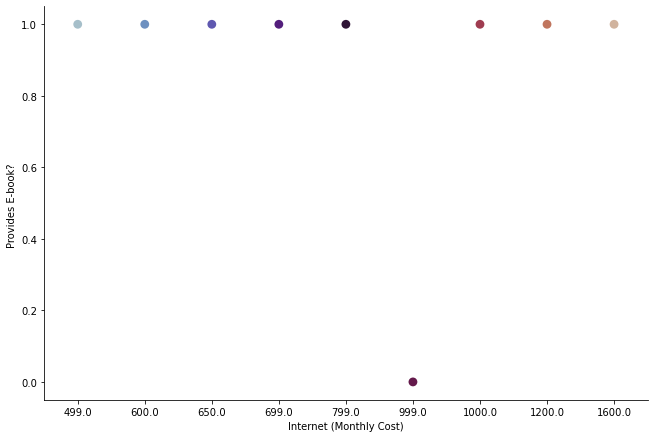

In [163]:
sns.catplot(x='Internet (Monthly Cost)',y='Provides E-book? ',data=photo_data,kind='point',palette='twilight',height=6,aspect=1.5)
plt.show()

## Photographic E-book hasn't been provided only for the internet monthly cost of ₹999.

In [203]:
brands = photo_data.groupby('Name')['Internet (Brand)'].max().sort_values(ascending=False).dropna().reset_index()
brands

,Name,Internet (Brand)
0,Paper Planes Photography,wishnet
1,Sen Photography,wish net
2,Tirtha Mitra Photography,siti cable
3,Avigyan Roy Photography,siti cable
4,Krishnendu Creations,meghbala
5,The Wedding Exposure,jiofibre
6,Studio New York,jiofibre
7,Passionate Photography,jiofibre
8,The Rawshooter photography,jio fibre
9,Leading Lines Photography,alliance


<Figure size 1440x720 with 0 Axes>

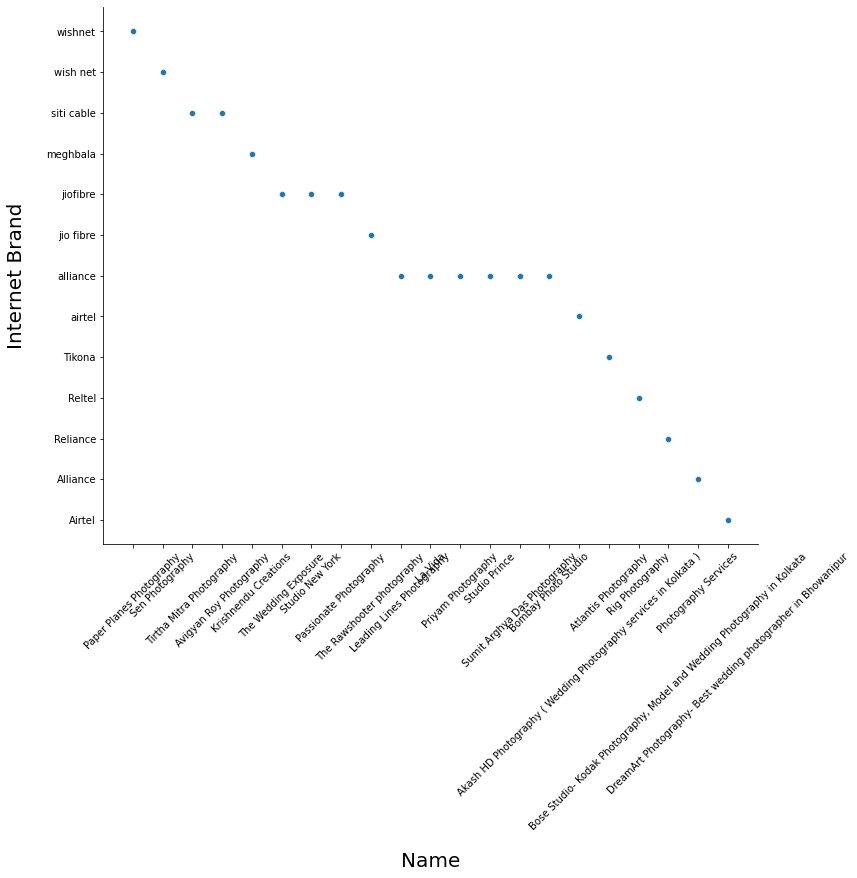

In [201]:
plt.figure(figsize=(20,10))
sns.relplot(x='Name',y='Internet (Brand)',data=brands,height=8,aspect=1.5)
plt.xticks(rotation=45)
plt.xlabel('Name',fontsize=20,labelpad=20)
plt.ylabel('Internet Brand',fontsize=20,labelpad=20)
plt.show()

In [204]:
photo_table = pd.crosstab(photo_data['Type'],photo_data['Problems'],margins=False)
photo_table.head()

Problems,Affect on orders due to Covid,Fall in orders,No,No work due to Covid,due to Covid,due to Covid,not getting client's,not work,postponed due to Covid
Type,,,,,,,,,
· Photographer,1,0,1,0,0,0,0,0,0
· Photography service,0,0,0,0,1,0,0,0,1
· Photography studio,0,0,0,1,0,0,0,0,0
· Wedding photographer,0,1,0,0,0,1,1,1,0


In [207]:
stat, p, dof, expected = stats.chi2_contingency(photo_table)

In [208]:
prob = 0.95
critical = stats.chi2.ppf(prob,dof)

if abs(stat) >= critical:
    print('Type and Problems are related')
else:
    print('Type and Problems are independent of each other')

Type and Problems are independent of each other


In [209]:
alpha = 1.0 - prob

if p <= alpha:
    print('Type and Problems are related')
else:
    print('Type and Problems are independent of each other')

Type and Problems are independent of each other


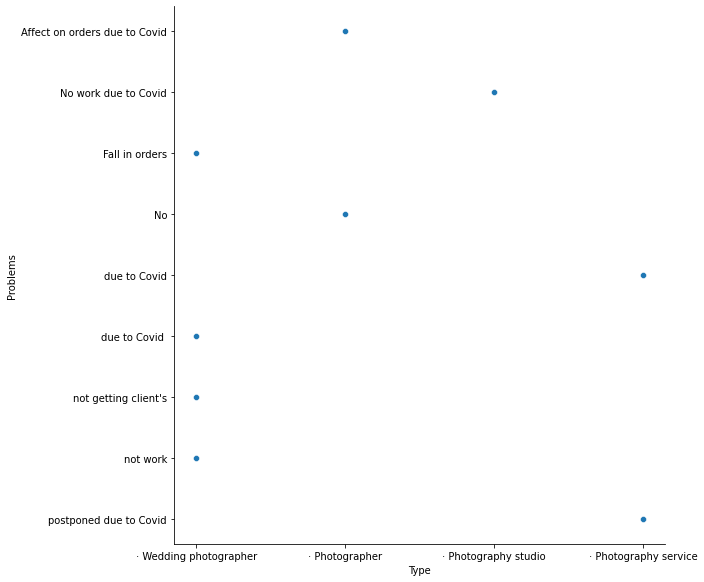

In [211]:
sns.relplot(x='Type',y='Problems',data=photo_data,palette='Blues',height=8,aspect=1.2)
plt.show()

## Wedding photography companies have faced the maximum number of problems like declination in number of orders, due to Covid disease, unavailability of clients and absence of any work. On the other hand, photography studio based companies has faced the minimum number of problems. 

In [217]:
name_prob = photo_data.groupby('Name')['Problems'].count().sort_values(ascending=False).dropna().reset_index()
print(len(name_prob[name_prob['Problems']==1]))

9


### Just 9 out of 123 companies have faced some sort of problems.

In [221]:
photo_data['Comment'].value_counts()

not connected                       18
not interested                      12
no issues                            5
Interested                           5
responded                            5
                                    ..
dont share info                      1
call me on Monday                    1
pixq.stp@gmail.com                   1
tirthamitraphotography@gmail.com     1
Bombayphotostudio@yahoo.co.in        1
Name: Comment, Length: 63, dtype: int64

In [229]:
comments = photo_data.groupby('Type')['Comment'].count().sort_values(ascending=False).dropna().reset_index()
comments

,Type,Comment
0,· Wedding photographer,40
1,· Photography studio,26
2,· Photographer,25
3,· Photography service,9
4,· Photo lab,4
5,· Advertising Photographer,2
6,· Digital printer,1
7,· Event management company,1
8,· Tour operator,1
9,· Website designer,1


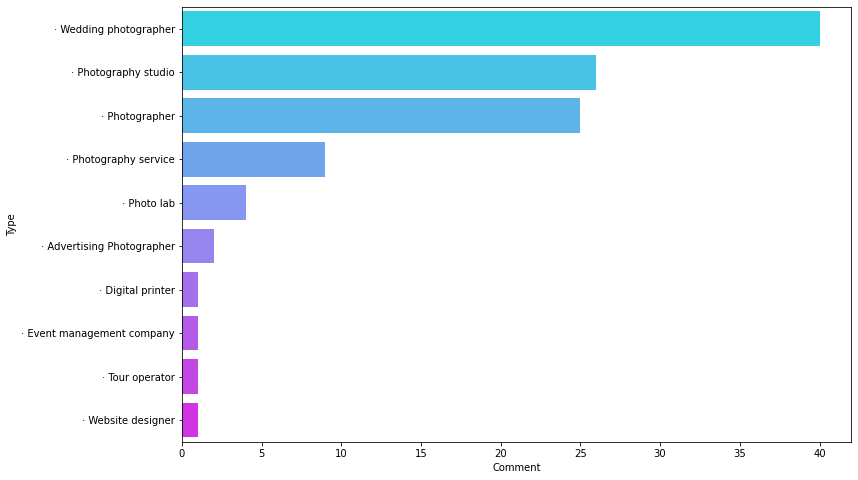

In [235]:
plt.figure(figsize=(12,8))
sns.barplot(x='Comment',y='Type',data=comments,palette='cool',orient='h')
plt.show()

## Wedding photographers have made the most number of comments while website designers have made the minimum.

In [237]:
problems = photo_data.groupby('Type')['Problems'].count().sort_values(ascending=False).dropna().reset_index()
problems

,Type,Problems
0,· Wedding photographer,4
1,· Photographer,2
2,· Photography service,2
3,· Photography studio,1
4,· Advertising Photographer,0
5,· Digital printer,0
6,· Event management company,0
7,· Photo lab,0
8,· Tour operator,0
9,· Website designer,0


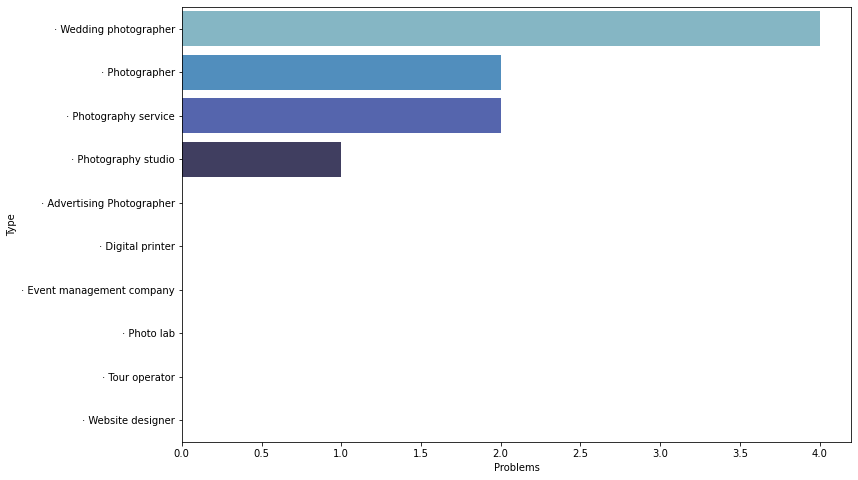

In [239]:
plt.figure(figsize=(12,8))
sns.barplot(x='Problems',y='Type',data=problems,palette='icefire',orient='h')
plt.show()

## Wedding photographers have faced the most number of problems. Some photography sections like advertising photographers, digital printers, event management companies, photo laboratories, tour operators and website designers have faced no problems so their work has been far more stable and least vulnerable to any problems.

In [254]:
pic_developments = photo_data.groupby('Type')['How is photograph developed?'].count().sort_values(ascending=False).dropna().reset_index()
pic_developments

,Type,How is photograph developed?
0,· Photographer,9
1,· Photography studio,6
2,· Wedding photographer,5
3,· Photography service,4
4,· Advertising Photographer,0
5,· Digital printer,0
6,· Event management company,0
7,· Photo lab,0
8,· Tour operator,0
9,· Website designer,0


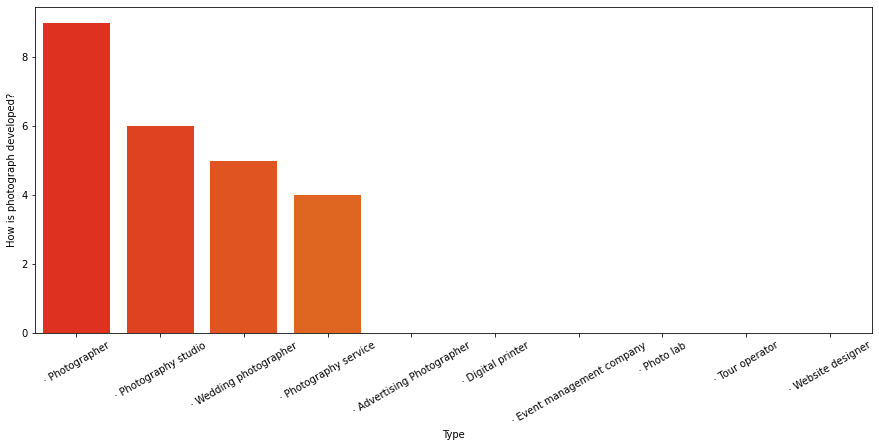

In [255]:
plt.figure(figsize=(15,6))
sns.barplot(x='Type',y='How is photograph developed?',data=pic_developments,palette='autumn')
plt.xticks(rotation=30)
plt.show()

## Photography companies have a wide variety of photograph development methods, while photography services is the least versatile in this regard.

# Multivariate Analysis

<Figure size 1080x576 with 0 Axes>

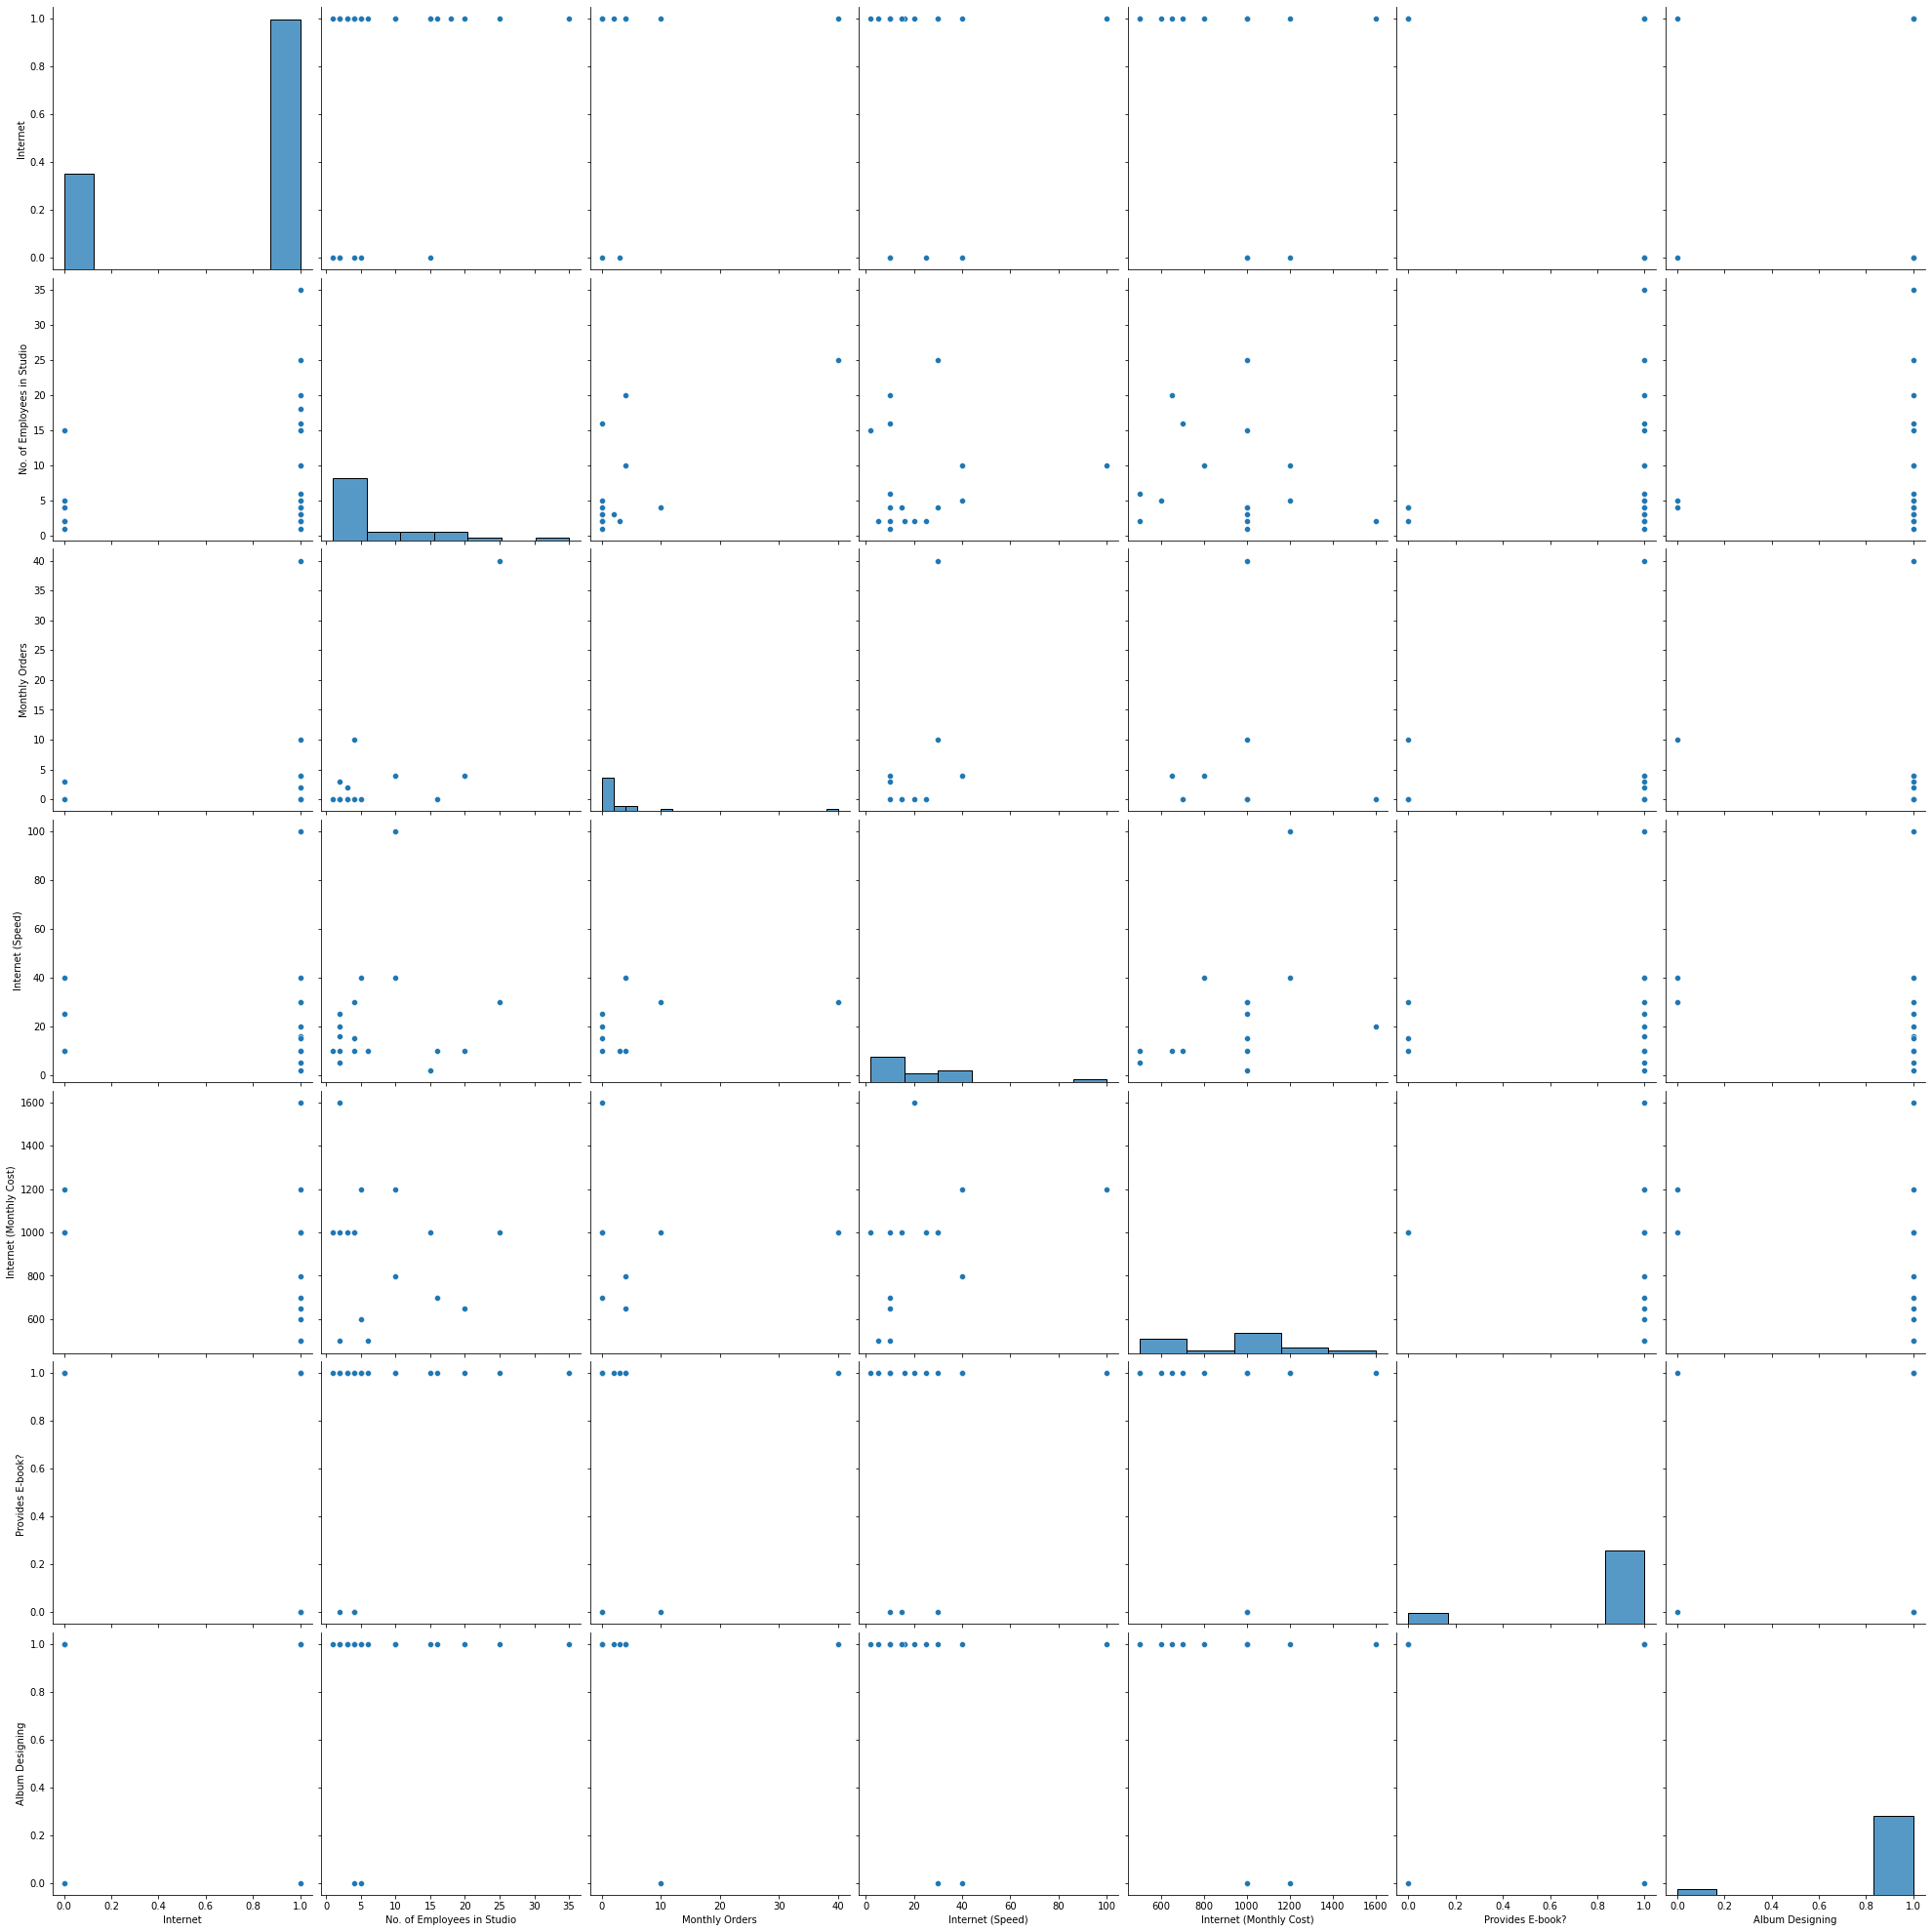

In [103]:
plt.figure(figsize=(15,8))
sns.pairplot(photo_data,height=4)
plt.show()

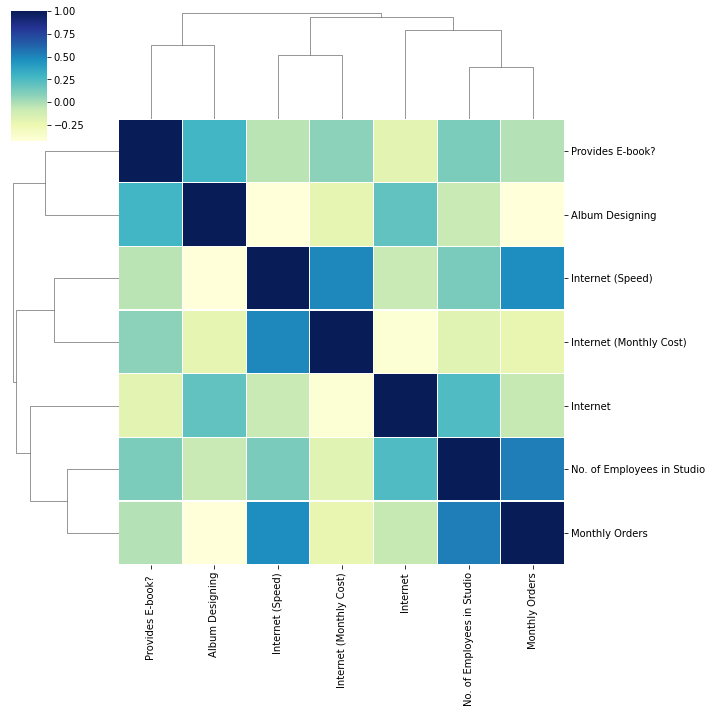

In [111]:
corrmat = photo_data.corr(method='spearman')
c_map = sns.clustermap(corrmat,cmap='YlGnBu',lw=0.1)
plt.setp(c_map.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
c_map

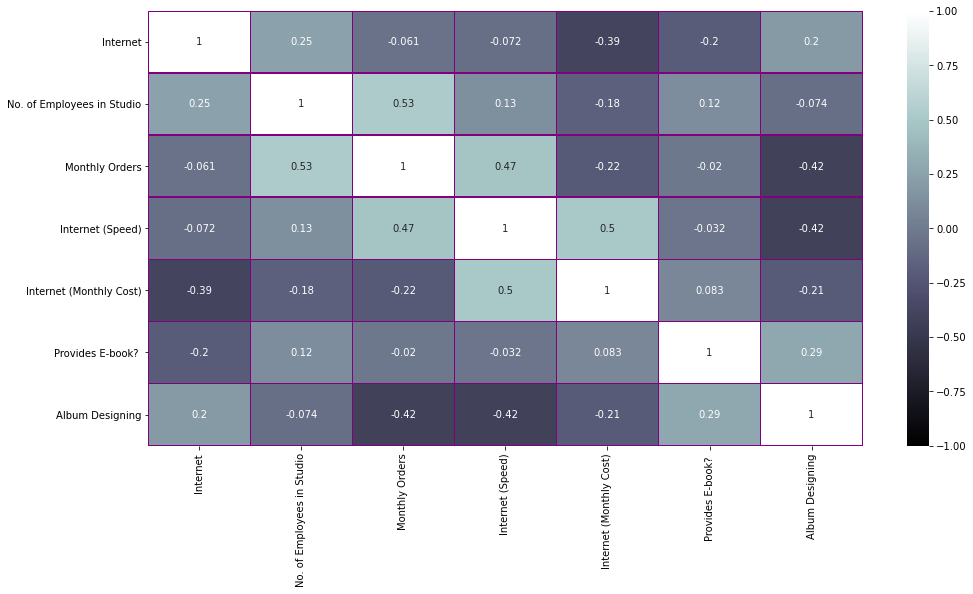

In [135]:
plt.figure(figsize=(16,8))
sns.heatmap(photo_data.corr(method='spearman'),annot=True,vmin=-1,vmax=1,cmap='bone',lw=0.5,linecolor='purple')
plt.show()